#Reading data

In [1]:
#importing necessary libiraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


warnings.filterwarnings('ignore')

pd.set_option('max_columns',None)

In [2]:
#loading the data 
leads_df=pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the shape of the dataframe
leads_df.shape

(9240, 37)

**Insight:-** The dataframe has total 9240 rows and 37 columns

In [4]:
#checkint=g the data types of the columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Insight:-**Maximum columns are of object types few columns are of integer type

In [5]:
#checking the statistical features of the numericals columns
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#Data Cleaning

##Checking for Duplicates

In [6]:
#checking for duplicates
leads_df1=leads_df[leads_df.duplicated()]
leads_df1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


Insight:- As there is no row present hence the dataframe does not contain any duplicate rows.

## Checking and imputing Missing and Null value

In [7]:
#checking the number of columns containing select value
leads_df[leads_df=='Select'].count()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

**Insight:-** As the value 'Select' is prsent in columns which means the user has not enter any value and hence can also be treated as a null value.

In [8]:
#replacing the Select value with null i.e. np.nan
leads_df=leads_df.replace('Select',np.nan)

In [9]:
#checking the percentage of null values in columns
leads_df.isnull().mean().sort_values(ascending=False)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
#dropping columns having null values greater than 45% 
col_drop=list(leads_df.columns[leads_df.isnull().mean()*100 > 45])

#adding Prospect and Lead Number as these value are unique and it will not help in analysis.
col_drop.extend(['Prospect ID','Lead Number'])

col_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Prospect ID',
 'Lead Number']

In [11]:
#data frame after dropping the columns 
leads_df.drop(columns=col_drop,inplace=True)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
#checking the null value percentage after dropping the columns
leads_df.isnull().mean().sort_values(ascending=False)*100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

**Insight:-**There are many columns which contains null value . We will check one by one and impute if necessary or else will drop the column.

### Categorical Columns containing null values

**City**

In [13]:
# % of null value in City
round(leads_df['City'].isnull().mean()*100,2)

39.71

In [14]:
#types of values in City columns
leads_df['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

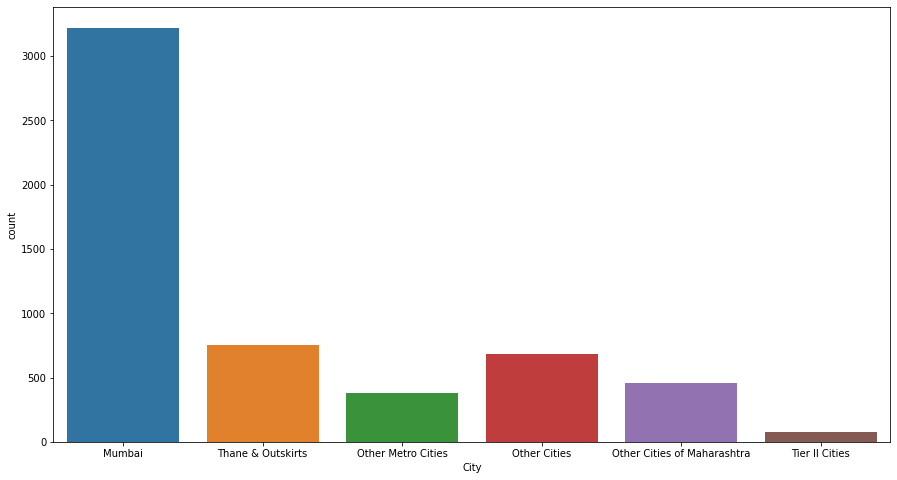

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(leads_df['City'])
plt.show()

**Insight:-** As the data have almost 40% of missing values . If we try to impute it then it will be skewed towards a particular value. Moreover it is a online paltform and hence it can be access online so if we drop the column city it will not affect our analysis much.

In [16]:
#dropping City column
leads_df.drop(columns='City',inplace=True)

**Specialization**

In [17]:
# Percentage of null value in Specialization
round(leads_df['Specialization'].isnull().mean()*100,2)

36.58

In [18]:
# Percentage of unique value
leads_df['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

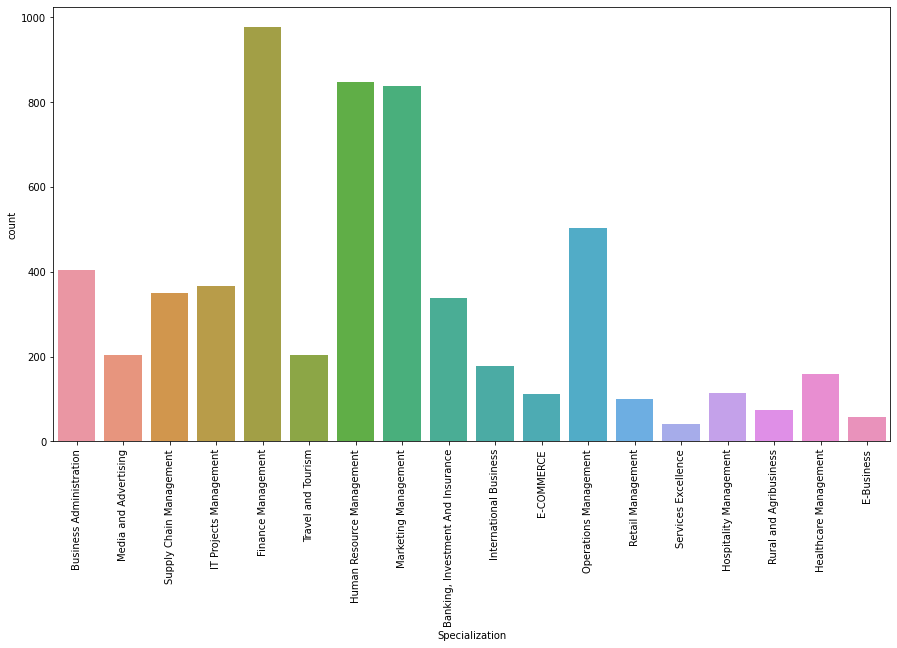

In [19]:
# distribution of value
plt.figure(figsize=(15,8))
sns.countplot(leads_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

**Insight:-** We will impute the null value with Others as it may be possible that the user may have no work experience or is a student.

In [20]:
# imputing value with others
leads_df['Specialization']=leads_df['Specialization'].replace(np.nan,'Others')
leads_df['Specialization'].value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

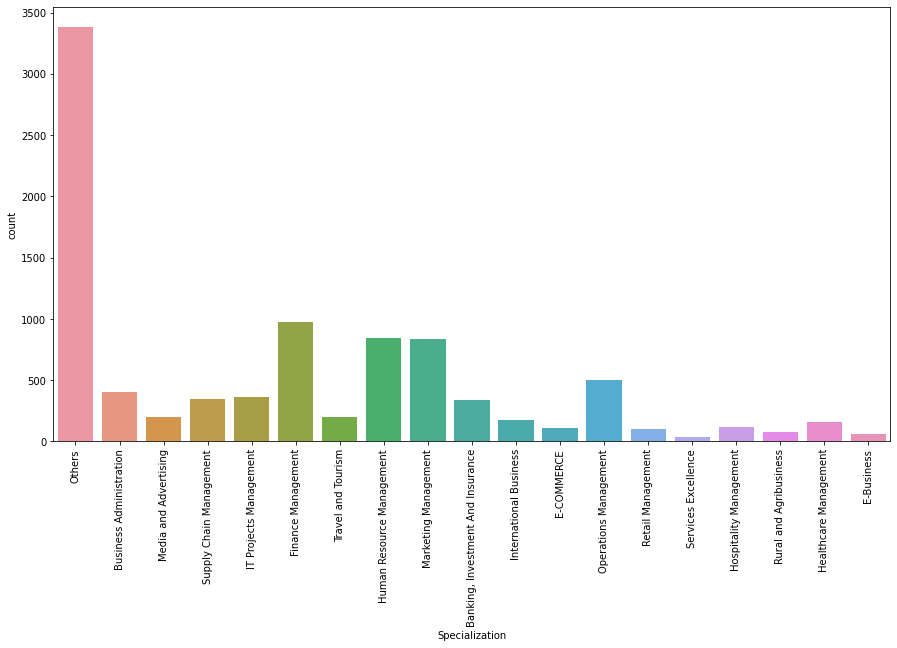

In [21]:
# after imputing the value ploting countplot to see the distribution of value 
plt.figure(figsize=(15,8))
sns.countplot(leads_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

**Tags**

In [22]:
# Percentage of null value in Tags
round(leads_df['Tags'].isnull().mean()*100,2)

36.29

In [23]:
# Percentage of unique value in Tags
round(leads_df['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

**Insight:-** We will drop this column as it a comment given by the sales team after contacting the lead and it will not add anything for model building. Hence we will drop this column.

In [24]:
# dropping Tags column
leads_df.drop(columns='Tags',inplace=True)

**What matters most to you in choosing a course**

In [25]:
# Percentage of null values
round(leads_df['What matters most to you in choosing a course'].isnull().mean()*100,2)

29.32

In [26]:
# Percentage of Unique values
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

**Insight:-** We will drop this column as it is heavily skewed towards a particular data

In [27]:
leads_df.drop(columns='What matters most to you in choosing a course',inplace=True)

**What is your current occupation**

In [28]:
# Percentage of null values
round(leads_df['What is your current occupation'].isnull().mean()*100,2)

29.11

In [29]:
# Percentage of Unique values
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

**Insight:-** we will add a new category as because if we impute it with mode than the data will be more skewed .

In [30]:
# Imputing the null value with unkown
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan,'Unkown')

#calcualting unique value after  imputing
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.606061
Unkown                  0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

**Country**

In [31]:
# Percentage of null values
round(leads_df['Country'].isnull().mean()*100,2)

26.63

In [32]:
# Percentage of unique values
round(leads_df['Country'].value_counts(normalize=True)*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

**Insight:-** As it is a online learning platform hence it will not add much value and it is also skewed towards a particular data therefore dropping the column

In [33]:
#dropping city column
leads_df.drop(columns='Country',inplace=True)

**Last Activity**

In [34]:
# Percentage of null values
round(leads_df['Last Activity'].isnull().mean()*100,2)

1.11

In [35]:
# Percentage of unique values
round(leads_df['Last Activity'].value_counts(normalize=True)*100,2)

Email Opened                    37.62
SMS Sent                        30.04
Olark Chat Conversation         10.65
Page Visited on Website          7.00
Converted to Lead                4.68
Email Bounced                    3.57
Email Link Clicked               2.92
Form Submitted on Website        1.27
Unreachable                      1.02
Unsubscribed                     0.67
Had a Phone Conversation         0.33
Approached upfront               0.10
View in browser link Clicked     0.07
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [36]:
#imputting the null value with mode
leads_df['Last Activity']=leads_df['Last Activity'].replace(np.nan,leads_df['Last Activity'].mode()[0])

# checking the number of null value present after imputting
leads_df['Last Activity'].isnull().sum()

0

**Lead Source**

In [37]:
# percentage of null value
round(leads_df['Lead Source'].isnull().mean(),4)

0.0039

In [38]:
# percentage of unique value
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [39]:
#imputting the null value with mode
leads_df['Lead Source']=leads_df['Lead Source'].replace(np.nan,leads_df['Lead Source'].mode()[0]).replace('google',leads_df['Lead Source'].mode()[0])

# checking the null value after imputing
leads_df['Lead Source'].isnull().sum()

0

### Numericals columns containing null values

In [40]:
# checking null values percentage in remaining columns
leads_df.isnull().mean().sort_values(ascending=False)*100

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Lead Origin                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Magazine                                    0.000000
Lead Source                                 0.000000
Search                                      0.000000
What is your current occupation             0.000000
Specialization                              0.000000
Last Activity                               0.

**Insight:-** TotalVisits and Page Views Per Visit contains null values

**TotalVisits**

In [41]:
#checking the satisticals part of TotalVisits
leads_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

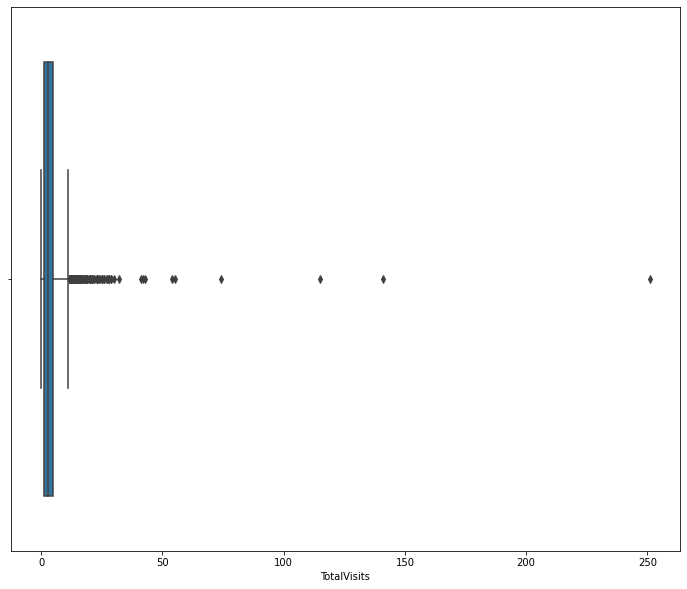

In [42]:
# cheking the presences of outlier in TotalVisits
plt.figure(figsize=(12,10))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

**Insight:-** As the column contains outliers hence imputing null values with median

In [43]:
# filling null values with median 
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median(),inplace=True)

# checking the null values after replacing
leads_df['TotalVisits'].isnull().mean()

0.0

**Page Views Per Visit**

In [44]:
#checking the satisticals part of Page Views Per Visit
leads_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

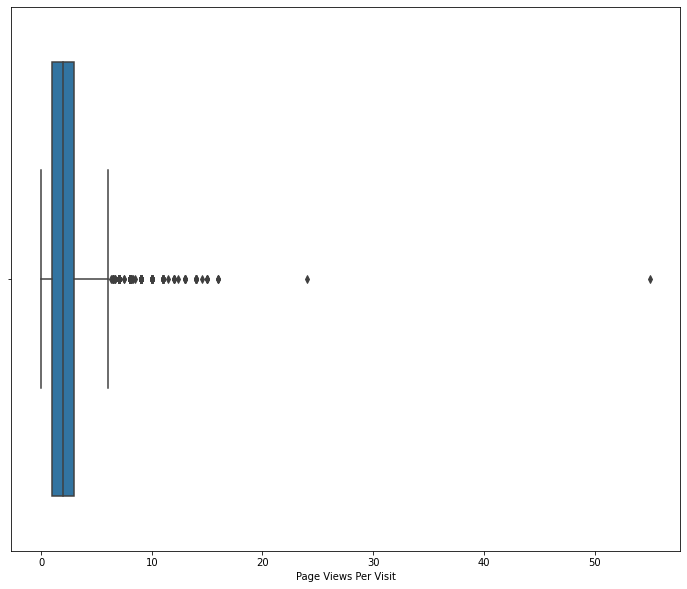

In [45]:
# cheking the presences of outlier
plt.figure(figsize=(12,10))
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

 **Insight:-** As the column contains outliers hence imputing null values with median

In [46]:
# filling null values with median 
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].median(),inplace=True)

# checking the null values after replacing
leads_df['Page Views Per Visit'].isnull().mean()

0.0

In [47]:
# checking if there are any null values
leads_df.isnull().mean()

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

**Insight:-** There are no null value present

## Outliers Treatement

In [48]:
#making list of numericals columns
num_col=[i for i in list(leads_df.columns) if leads_df[i].dtype != 'O']
num_col.remove('Converted')
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

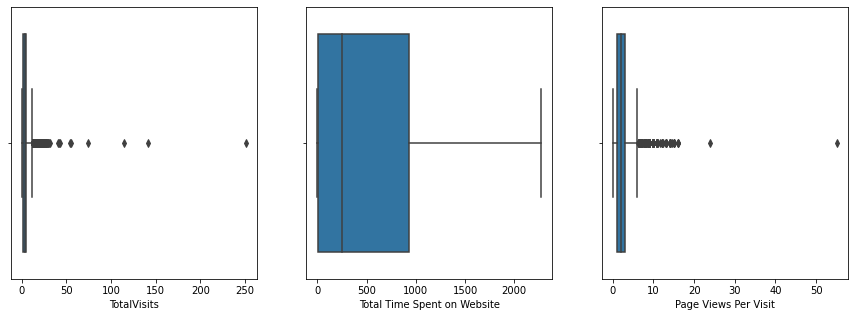

In [49]:
#looking for outliers in  numericals columns
plt.figure(figsize=(15,5))
for i in range(len(num_col)):
  plt.subplot(1,3,i+1)
  sns.boxplot(leads_df[num_col[i]])
plt.show()

**Insight:-** As ToalVisits  and Page views Per Visit columns contians outliers hence need to be taken care. While column Time on Website is free from outliers

In [50]:
# checking the quantile values 
leads_df[num_col].quantile([0.1,0.25,.5,.75,.85,0.9,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0.10,0.0,0.00,0.0
0.25,1.0,12.00,1.0
0.50,3.0,248.00,2.0
0.75,5.0,936.00,3.0
0.85,6.0,1233.15,4.0
0.90,7.0,1380.00,5.0
0.95,10.0,1562.00,6.0
0.99,17.0,1840.61,9.0


**Insight:-** As there are outliers in both the columns but outliers are valid value so we will cap them. To retain the data . 99% data will be capped to 95% as they very close hence impact will be same.



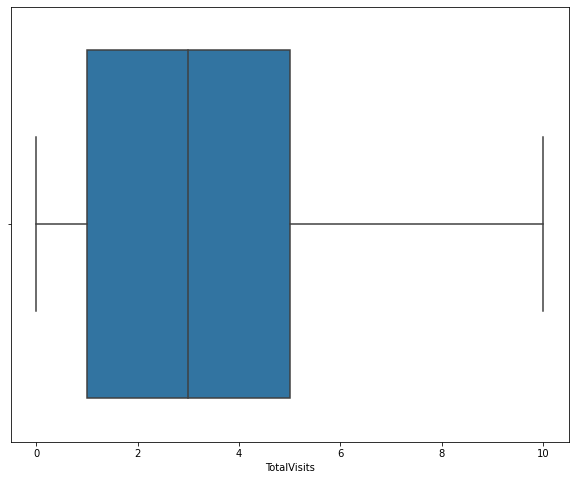

In [51]:
#capping TotalVisits
Q95=leads_df['TotalVisits'].quantile(.95)
leads_df.loc[leads_df['TotalVisits'] > Q95, 'TotalVisits'] = Q95

#plotting boxplot to check the outliers
plt.figure(figsize=(10,8))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

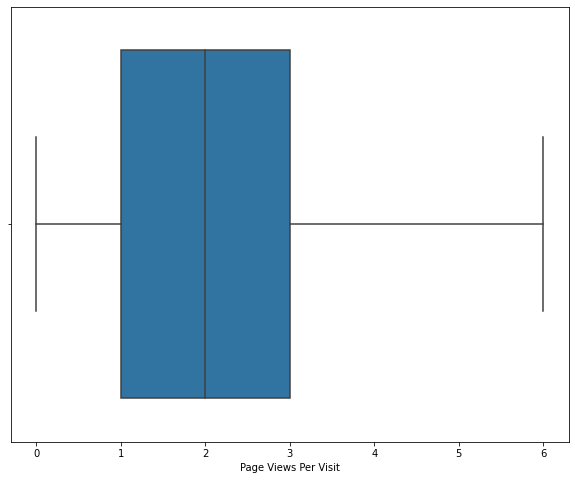

In [52]:
#capping Page Views Per Visit
Q95=leads_df['Page Views Per Visit'].quantile(.95)
leads_df.loc[leads_df['Page Views Per Visit'] > Q95, 'Page Views Per Visit'] = Q95

#plotting boxplot to check the outliers
plt.figure(figsize=(10,8))
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

In [53]:
#changing the long columns name to shorter version for analysis 
leads_df.rename(columns={'Total Time Spent on Website':'Time on Website',
                   'What is your current occupation':'Occupation',
                   'Through Recommendations':'Recommendations',
                   'Receive More Updates About Our Courses':'Receive Updates',
                   'Update me on Supply Chain Content':'Update on Supply Chain',
                   'Get updates on DM Content':'Updates on DM Content',
                   'I agree to pay the amount through cheque':'Amount through cheque',
                   'A free copy of Mastering The Interview':'Free_copy'
                   },inplace=True)

# Explotary Data Analysis

##Univarite and Bivariate Analysis on Categorical Variables


In [54]:
#listing the column present in dataframe
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Time on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendations', 'Receive Updates',
       'Update on Supply Chain', 'Updates on DM Content',
       'Amount through cheque', 'Free_copy', 'Last Notable Activity'],
      dtype='object')

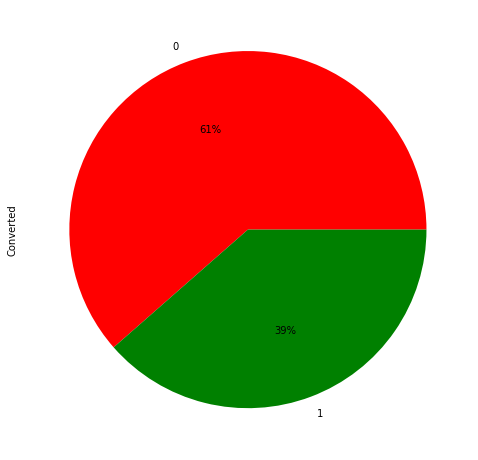

In [55]:
#percentage of data imbalance
plt.figure(figsize=(8,10)) 
leads_df['Converted'].value_counts(normalize=True).plot.pie(labels=leads_df['Converted'].value_counts(normalize=True).index,autopct='%1.0f%%',colors=['red','green'])
plt.show()


**Insight:-** There is data imbalance in the dataframe about 39% are converted while 61% are not.

In [56]:
#function for plotting graph and calcutaing percentage of conversion 
def univariate_analysis(col):
  
  # dataframe containing details of all total count , percentage
  d=leads_df[leads_df['Converted']==1][col].value_counts()
  d=pd.DataFrame(d)
  d['Total_Count']=leads_df[col].value_counts()
  d['%_converted']=round((d[col]/d['Total_Count'])*100,2)
  d=d.sort_values("%_converted")
  d=d.reset_index()
  d.columns=[col,'Lead_converted','Total_Count','%_converted']
  display(d)

  #plotting countplot
  plt.figure(figsize=(25,10))
  plt.subplot(1,2,1)
  sns.countplot(x=col,data=leads_df,hue='Converted')
  plt.xticks(rotation=45)

  #plotting bar plot
  plt.subplot(1,2,2)
  sns.barplot(x=col,y='%_converted',data=d)
  plt.xticks(rotation=45)
  plt.show()
  




**Lead Origin**

,Lead Origin,Lead_converted,Total_Count,%_converted
0,Lead Import,13,55,23.64
1,API,1115,3580,31.15
2,Landing Page Submission,1768,4886,36.19
3,Lead Add Form,664,718,92.48
4,Quick Add Form,1,1,100.00


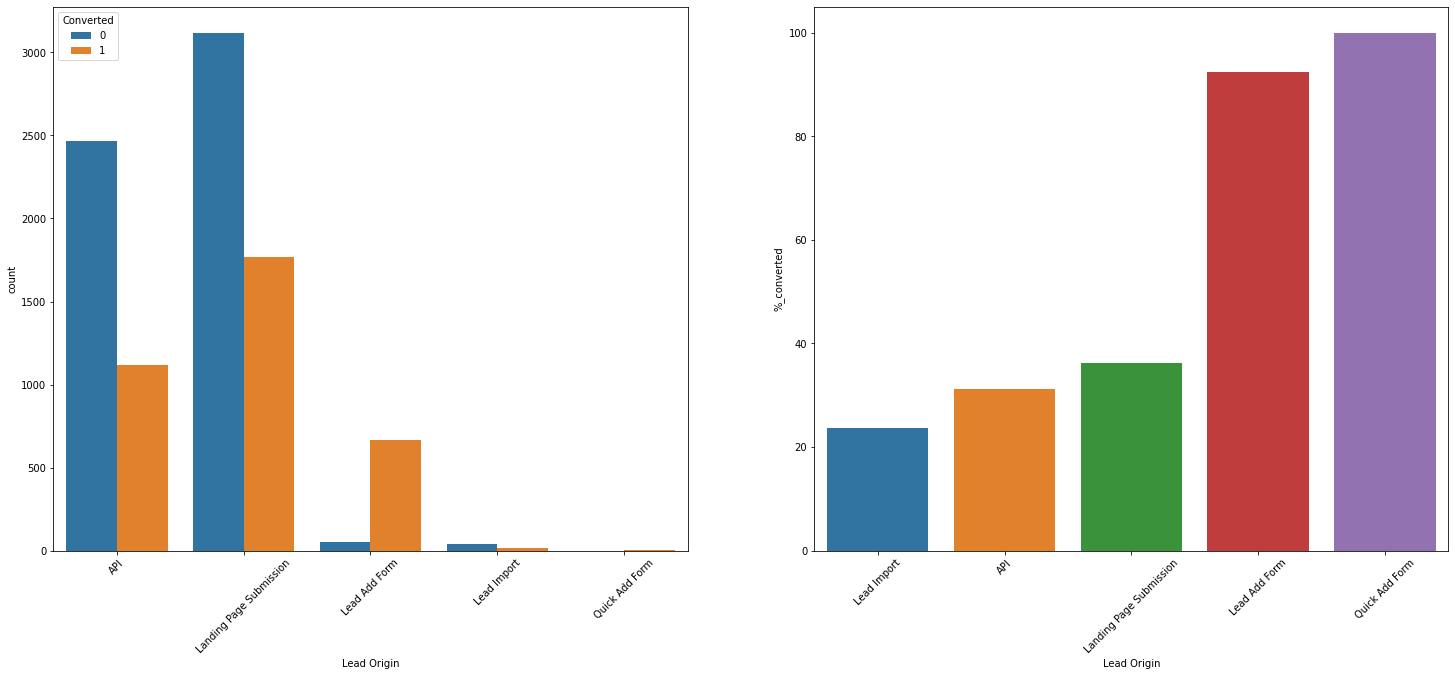

In [57]:
univariate_analysis('Lead Origin')

**Insight:-** 

1.  Maximum leads are from Landing Page Submission with a total count of 4886.

2.   Lead convergence rate is higher in Lead Add Form(92.48%) and Quick Add Form(100%) . However there is only 1 lead present in Quick Add Form and which is converted.
3. Lead Import are very less in count and conversion rate is also the lowest.
4. More focous should be given on converting the lead of Landing Page Submission as they are high in number and more count should be increase of Lead Add Form as they have high convergence rate














**Lead Source**

,Lead Source,Lead_converted,Total_Count,%_converted
0,bing,1,6,16.67
1,Facebook,13,55,23.64
2,Referral Sites,31,125,24.80
3,Olark Chat,448,1755,25.53
4,Direct Traffic,818,2543,32.17
5,Organic Search,436,1154,37.78
6,Google,1176,2909,40.43
7,Social Media,1,2,50.00
8,Click2call,3,4,75.00
9,Reference,490,534,91.76


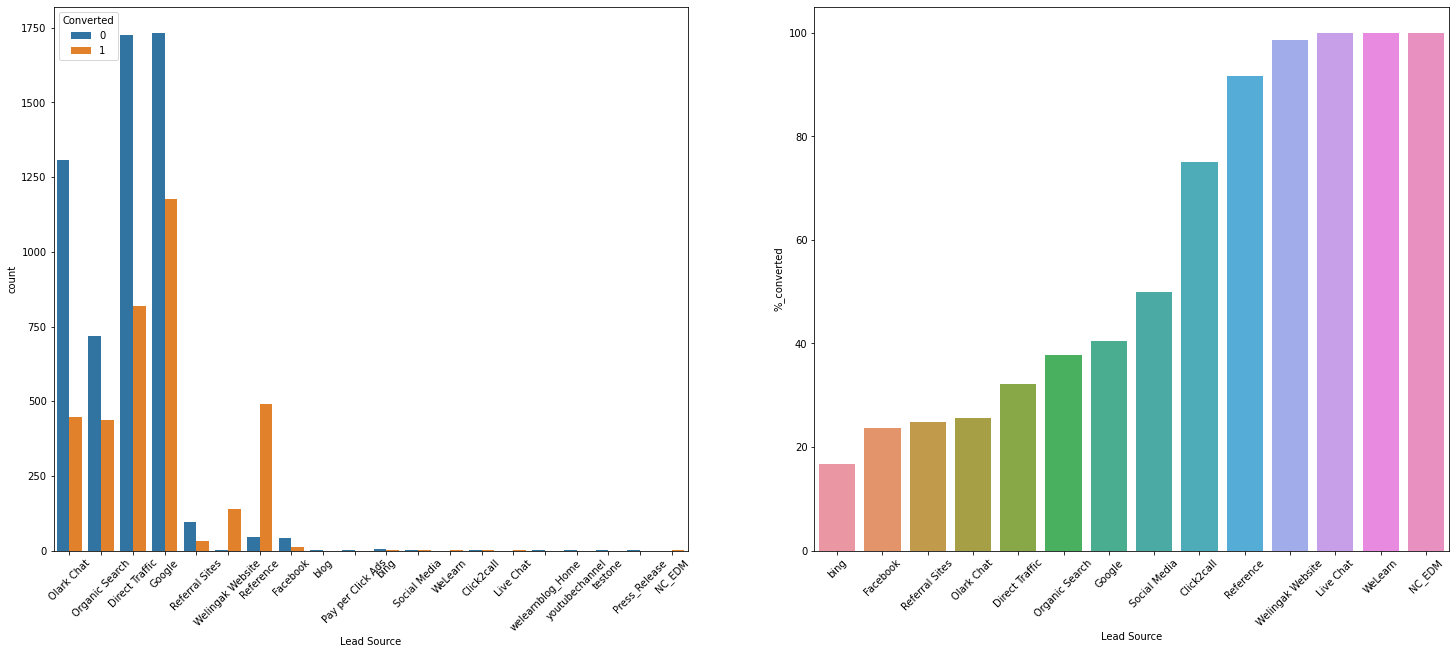

In [58]:
univariate_analysis('Lead Source')

Merging all the small Lead Source category together Less Popular Sources 

In [59]:
leads_df['Lead Source']=leads_df['Lead Source'].replace(['bing','Social Media','Click2call','Live Chat' ,'WeLearn','NC_EDM','Press_Release','blog','Pay per Click Ads'
                                              ,'welearnblog_Home','youtubechannel','testone'],'Less Popular Sources')
leads_df['Lead Source'].value_counts()

Google                  2909
Direct Traffic          2543
Olark Chat              1755
Organic Search          1154
Reference                534
Welingak Website         142
Referral Sites           125
Facebook                  55
Less Popular Sources      23
Name: Lead Source, dtype: int64

,Lead Source,Lead_converted,Total_Count,%_converted
0,Facebook,13,55,23.64
1,Referral Sites,31,125,24.80
2,Olark Chat,448,1755,25.53
3,Direct Traffic,818,2543,32.17
4,Organic Search,436,1154,37.78
5,Less Popular Sources,9,23,39.13
6,Google,1176,2909,40.43
7,Reference,490,534,91.76
8,Welingak Website,140,142,98.59


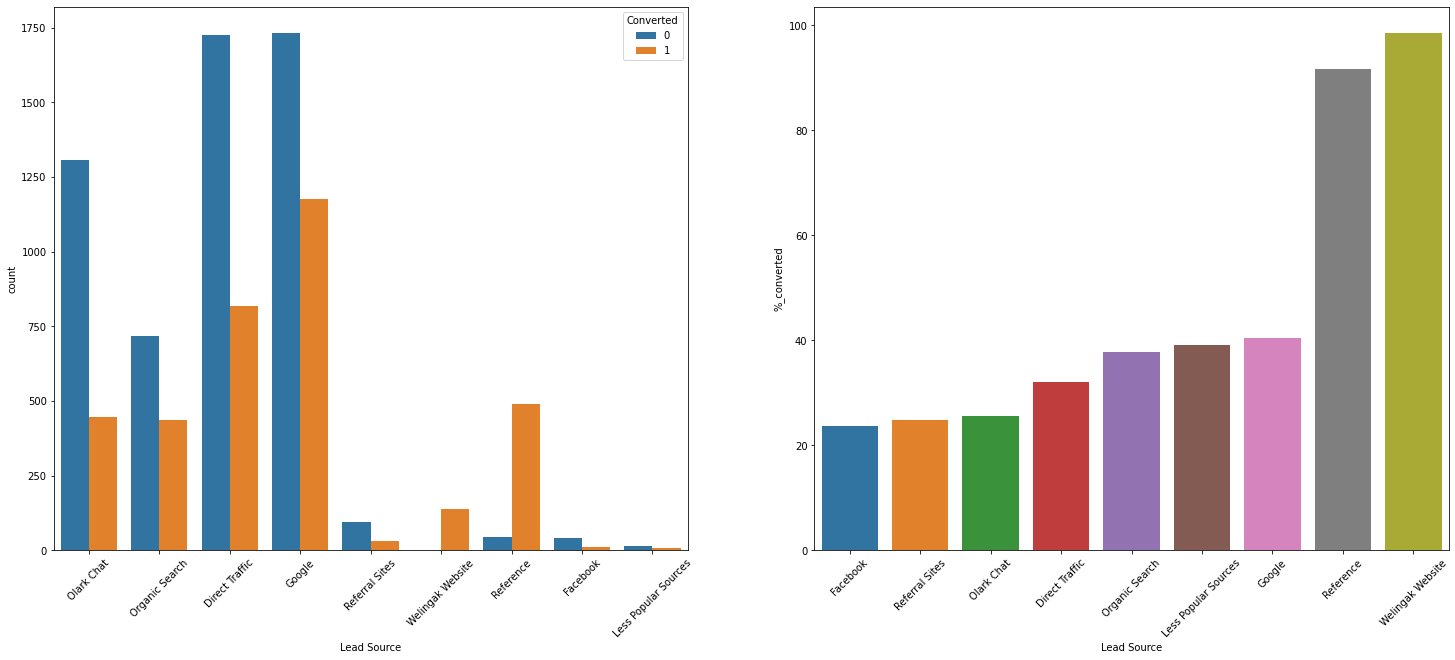

In [60]:
univariate_analysis('Lead Source')

 
**Insight:-**
1.   Maximum leads are from source Google 2909 and its conversion rate is 40%. Followed by Direct Traffic (32%) , Olark Chat (25%) and so on. 
2. Maximum Convergence rate are from Reference(91%) and Welingak Website(98%) .
3. Lowest are from the Facebook with a total count of 55 and a convergence rate of 23.64
4. More focous should be given on converting the lead of Google as they are high in number and more count should be increase of Welingak Website as they have high convergence rate.  





**Last Activity**

,Last Activity,Lead_converted,Total_Count,%_converted
0,Email Bounced,26,326,7.98
1,Olark Chat Conversation,84,973,8.63
2,Converted to Lead,54,428,12.62
3,View in browser link Clicked,1,6,16.67
4,Page Visited on Website,151,640,23.59
5,Form Submitted on Website,28,116,24.14
6,Unsubscribed,16,61,26.23
7,Email Link Clicked,73,267,27.34
8,Unreachable,31,93,33.33
9,Email Opened,1334,3540,37.68


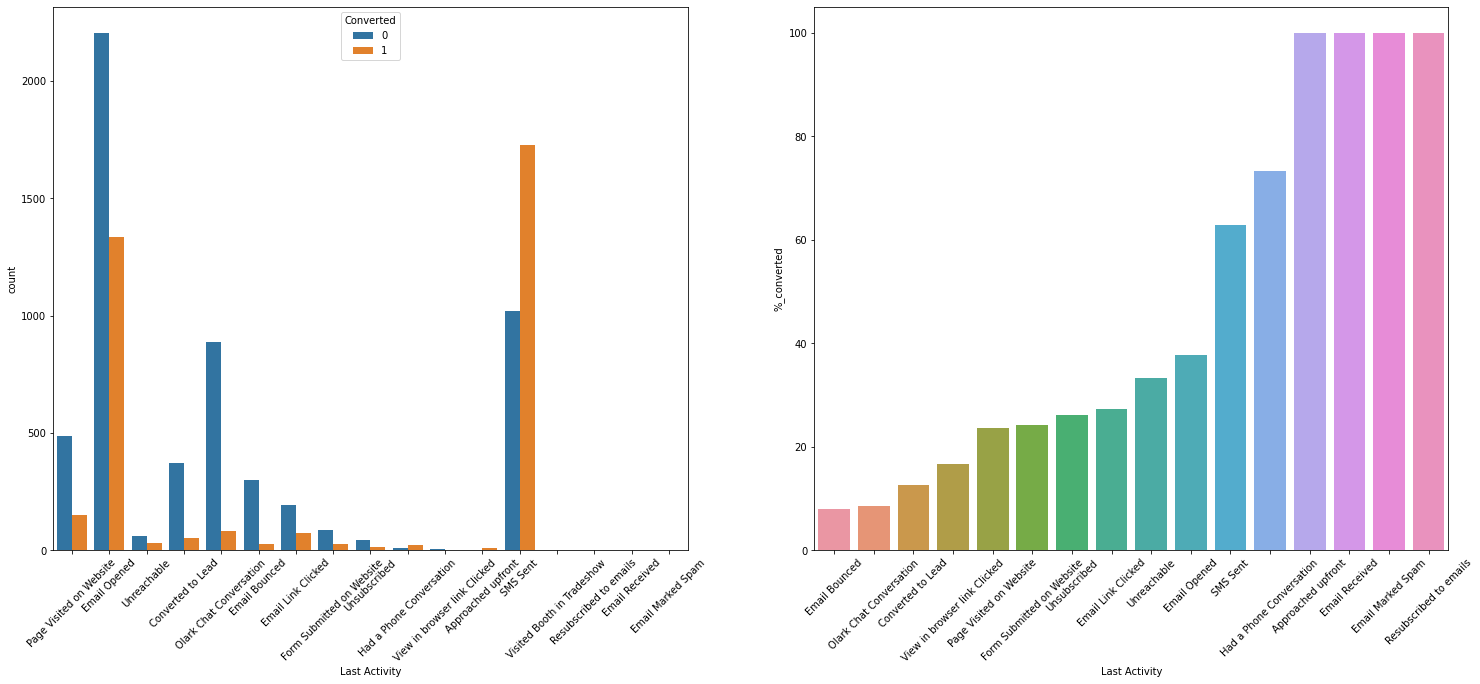

In [61]:
univariate_analysis('Last Activity')

Combining all the last activity with small count as Less Popular Activity

In [62]:
leads_df['Last Activity']=leads_df['Last Activity'].replace(['Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow'
                                                  'Visited Booth in Tradeshow','Visited Booth in Tradeshow','Resubscribed to emails'],'Less Popular Activity')
leads_df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Less Popular Activity          21
Name: Last Activity, dtype: int64

,Last Activity,Lead_converted,Total_Count,%_converted
0,Email Bounced,26,326,7.98
1,Olark Chat Conversation,84,973,8.63
2,Converted to Lead,54,428,12.62
3,Page Visited on Website,151,640,23.59
4,Form Submitted on Website,28,116,24.14
5,Unsubscribed,16,61,26.23
6,Email Link Clicked,73,267,27.34
7,Unreachable,31,93,33.33
8,Email Opened,1334,3540,37.68
9,SMS Sent,1727,2745,62.91


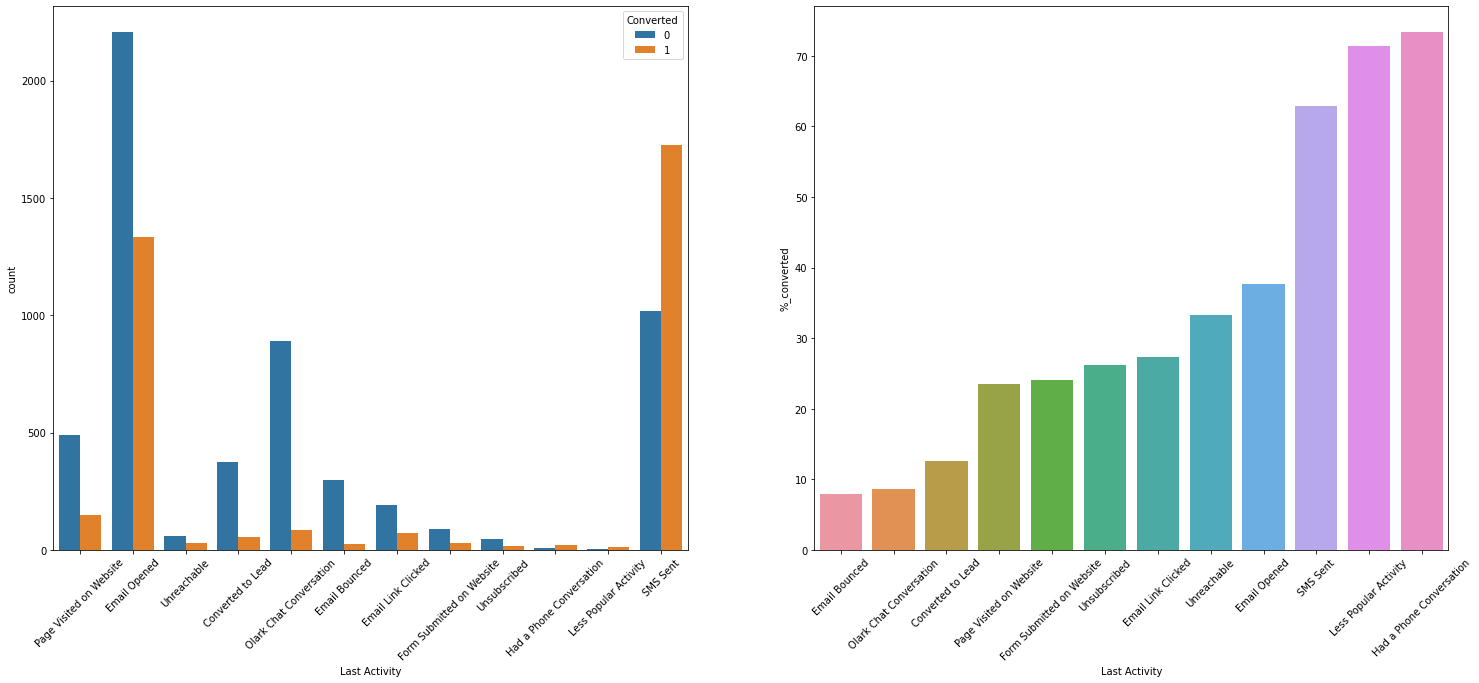

In [63]:
univariate_analysis('Last Activity')

**Insight:-**
1.   Maximum leads are from who's Last Activity  was Email opened witha count of 3540 and its conversion rate is 37%. 
2. Maximum Convergence rate are from Had a Phone Conversation(73.33%) and Less Popular Activity(71.43%) which is the combination of all small last activity.
3. Lowest are from the Olark Chat Conversation with a total count of 973 and a convergence rate of 8.63%
 


**Specialization**

,Specialization,Lead_converted,Total_Count,%_converted
0,Services Excellence,11,40,27.50
1,Others,969,3380,28.67
2,Retail Management,34,100,34.00
3,Travel and Tourism,72,203,35.47
4,E-COMMERCE,40,112,35.71
5,International Business,64,178,35.96
6,E-Business,21,57,36.84
7,IT Projects Management,140,366,38.25
8,Media and Advertising,85,203,41.87
9,Hospitality Management,48,114,42.11


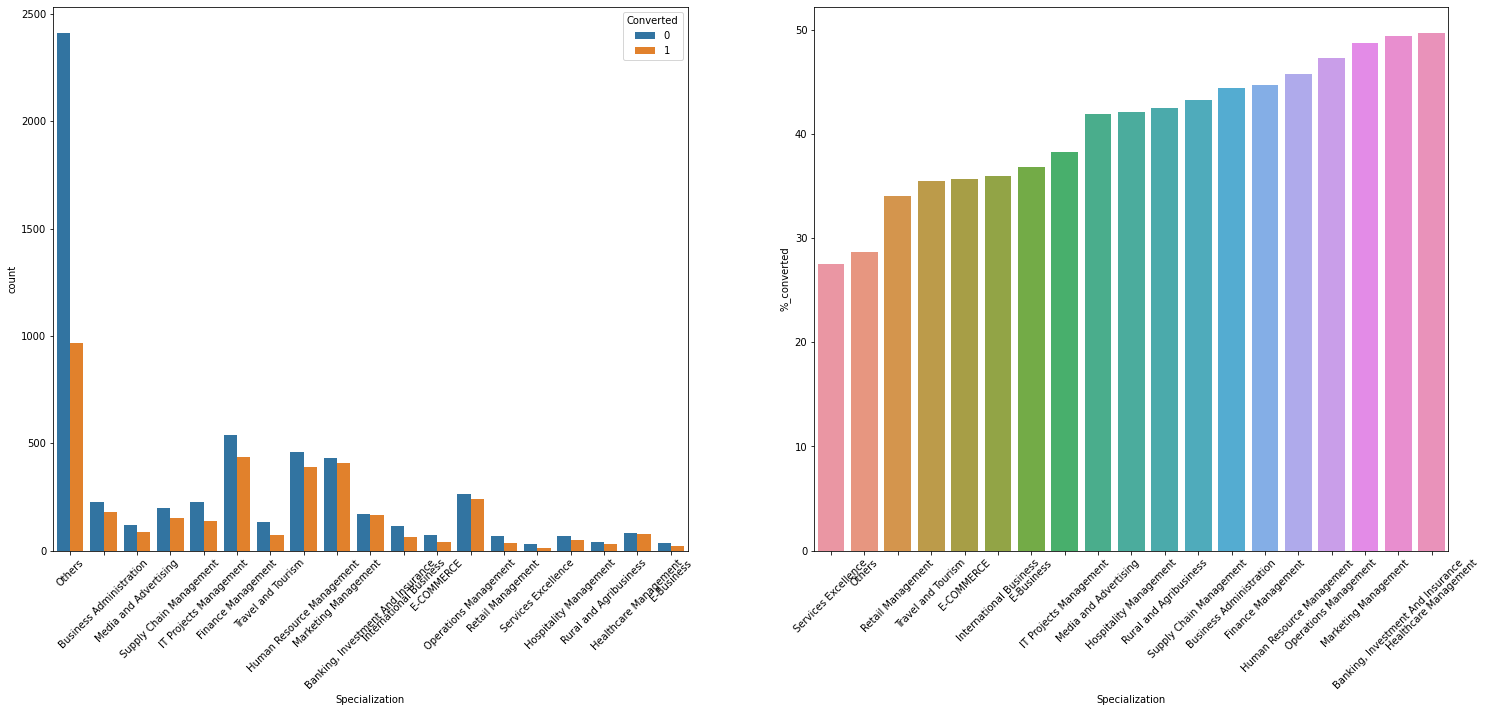

In [64]:
univariate_analysis('Specialization')

**Insight:-**
1. Maximum values are Others which we have imputed in place of null values and has a convergence rate 0f 28%.
2. Healthcare - management has highest convergence rate 49.69%.
3. Services Excellenc has low count of specialization(40)  and lowest convergences rate 27.50% .




**Occupation**

,Occupation,Lead_converted,Total_Count,%_converted
0,Unkown,370,2690,13.75
1,Student,78,210,37.14
2,Unemployed,2441,5600,43.59
3,Other,10,16,62.50
4,Businessman,5,8,62.50
5,Working Professional,647,706,91.64
6,Housewife,10,10,100.00


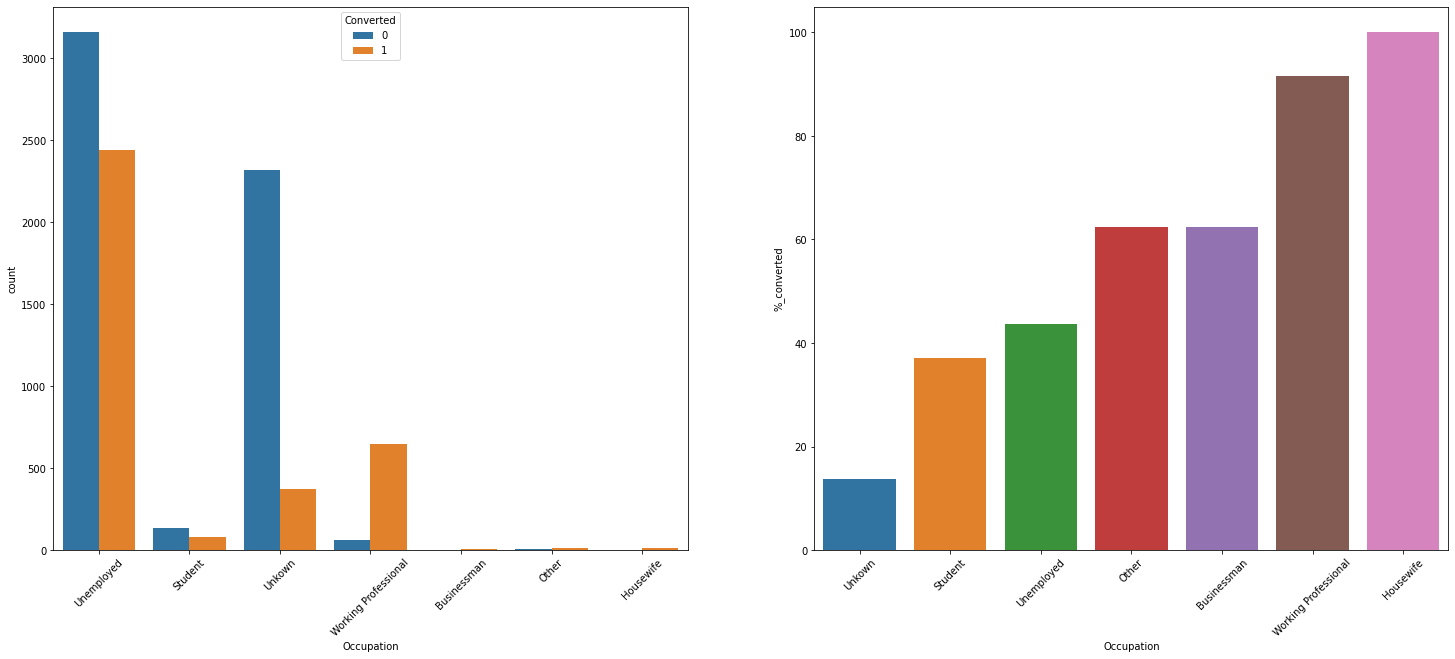

In [65]:
univariate_analysis('Occupation')

**Insight:-**
1. Maximum leads are people who are unemployed and has a convergence rate 0f 43.59%.
2. Housewife have the highest convergence rate of 100% followed by Working Professional who have 91.64% convergence rate.
3.People whose occupation is Unkown has second highest count of specialization(2690) and lowest convergences rate 13.75% .   





,Last Notable Activity,Lead_converted,Total_Count,%_converted
0,Olark Chat Conversation,25,183,13.66
1,Email Bounced,9,60,15.00
2,Modified,783,3407,22.98
3,Email Link Clicked,45,173,26.01
4,Page Visited on Website,93,318,29.25
5,Unsubscribed,14,47,29.79
6,Email Opened,1044,2827,36.93
7,Unreachable,22,32,68.75
8,SMS Sent,1508,2172,69.43
9,Had a Phone Conversation,13,14,92.86


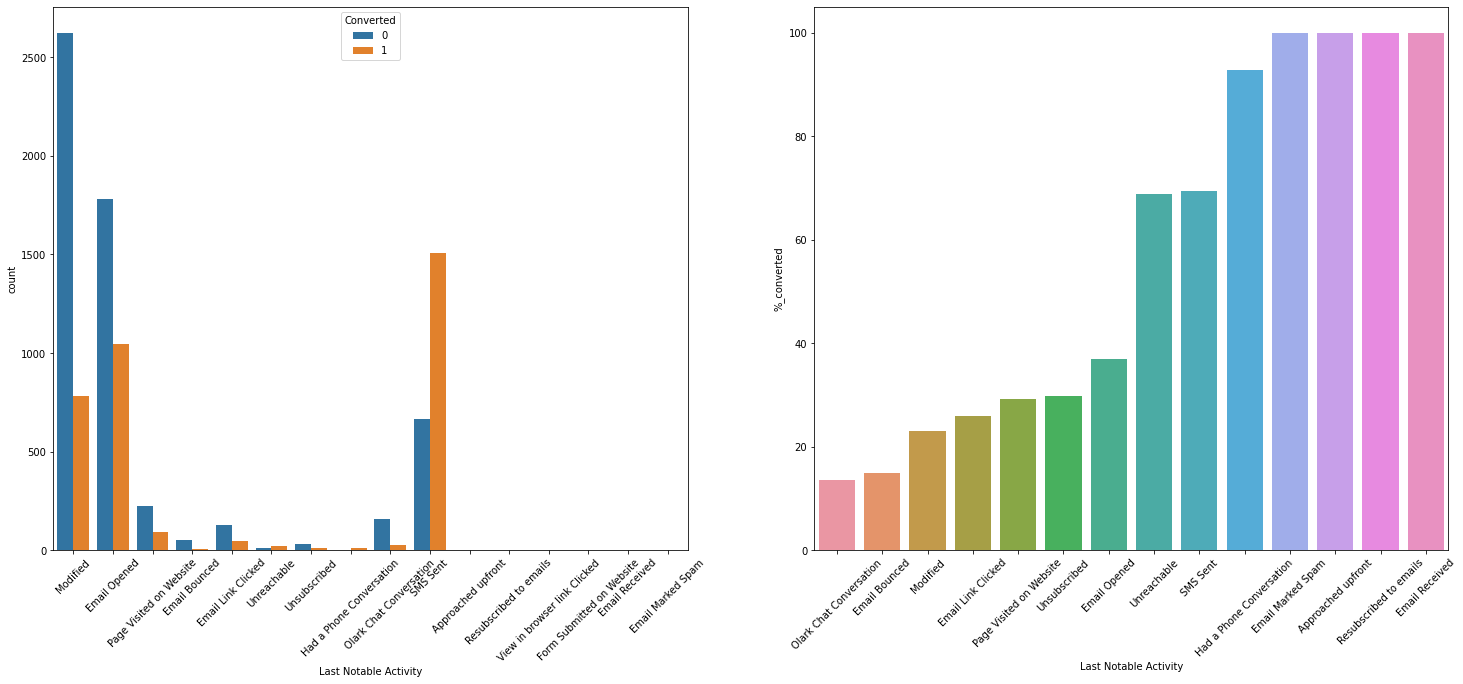

In [66]:
univariate_analysis('Last Notable Activity')

**Insight:-** It seems that Maximum convergences rate are from the had a phone conversation while there are other activity which contribute but they are very less in number.

Plotting **Pie chart** for all the binary variables together

In [67]:
l=list(leads_df.columns[11:23])
l.extend(['Do Not Email','Do Not Call'])
l

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Recommendations',
 'Receive Updates',
 'Update on Supply Chain',
 'Updates on DM Content',
 'Amount through cheque',
 'Free_copy',
 'Do Not Email',
 'Do Not Call']

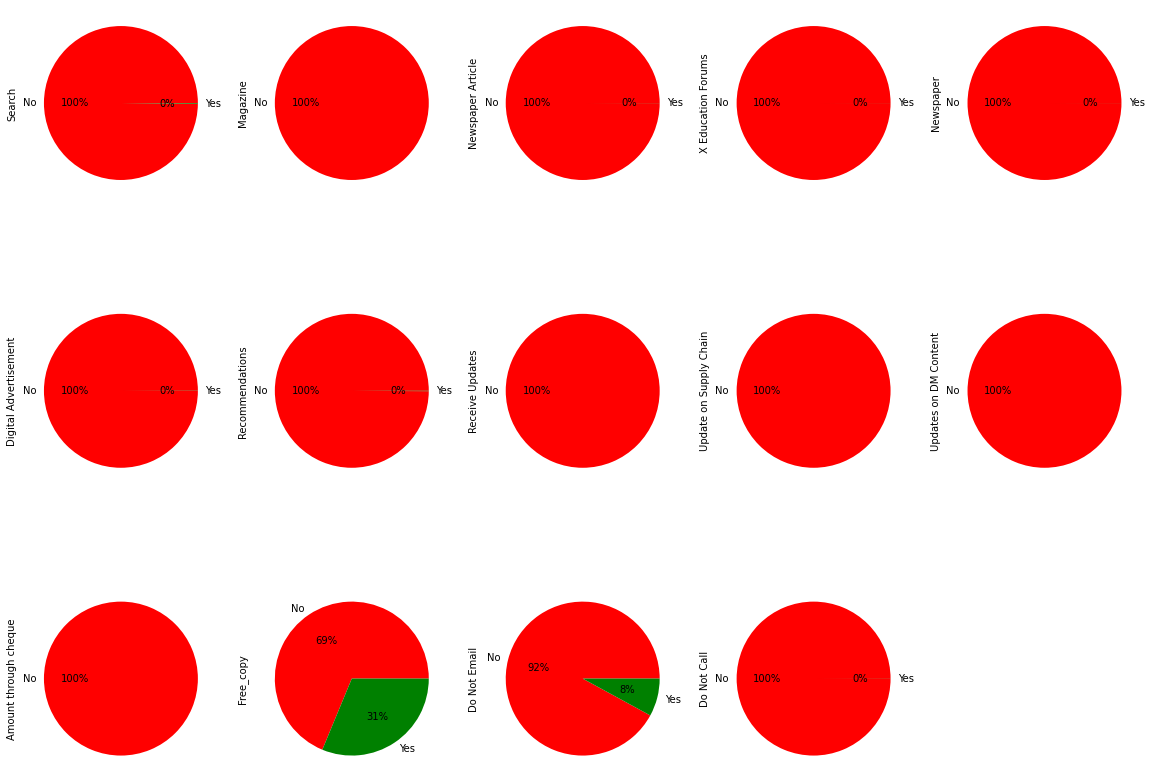

In [68]:
plt.figure(figsize=(20,15))
for i in range(len(l)):
  plt.subplot(3,5,i+1)
  leads_df[l[i]].value_counts(normalize=True).plot.pie(labels=leads_df[l[i]].value_counts(normalize=True).index,autopct='%1.0f%%',colors=['red','green'])
plt.show()  


**Insight:-**  Do not Email and Free_copy has some positive value we will analyze them and drop rest of the column as it is skewed towards one value

**Free_copy**

,Free_copy,Lead_converted,Total_Count,%_converted
0,Yes,1030,2888,35.66
1,No,2531,6352,39.85


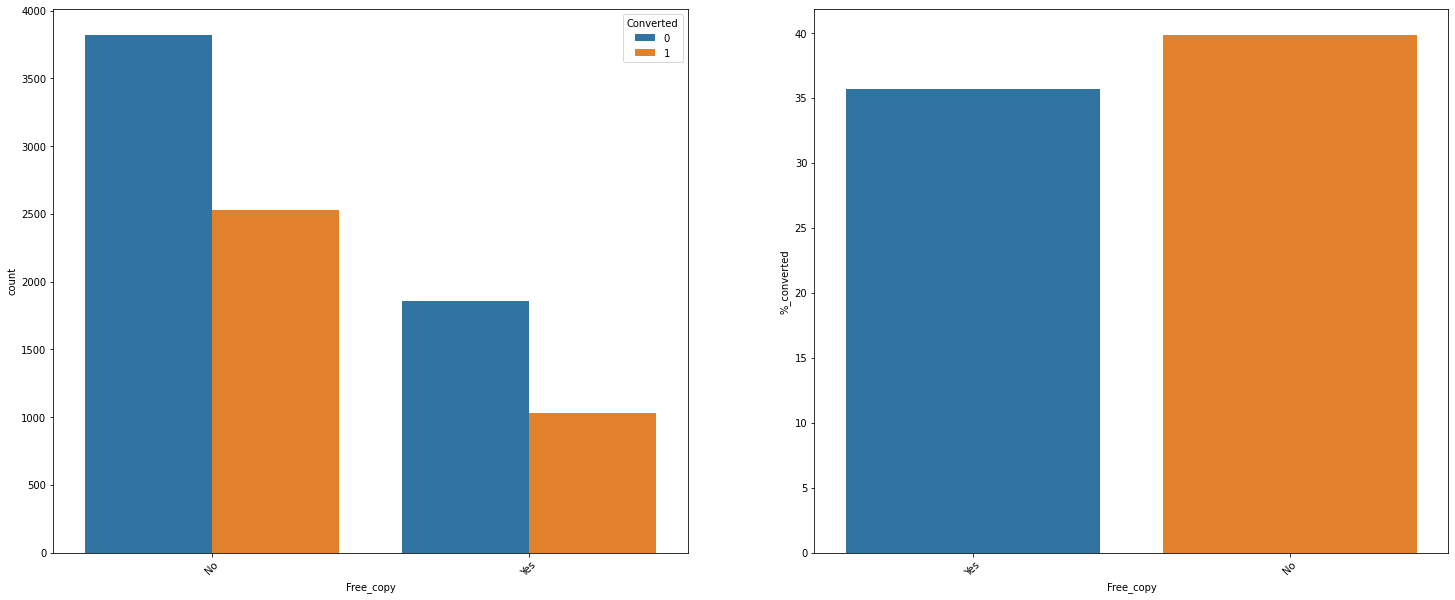

In [69]:
univariate_analysis('Free_copy')

**Insight:-** As the Convergence rate for both are almost same hence we need to drop these columns more over this columns doesn't add much value

**Do Not Email**

,Do Not Email,Lead_converted,Total_Count,%_converted
0,Yes,118,734,16.08
1,No,3443,8506,40.48


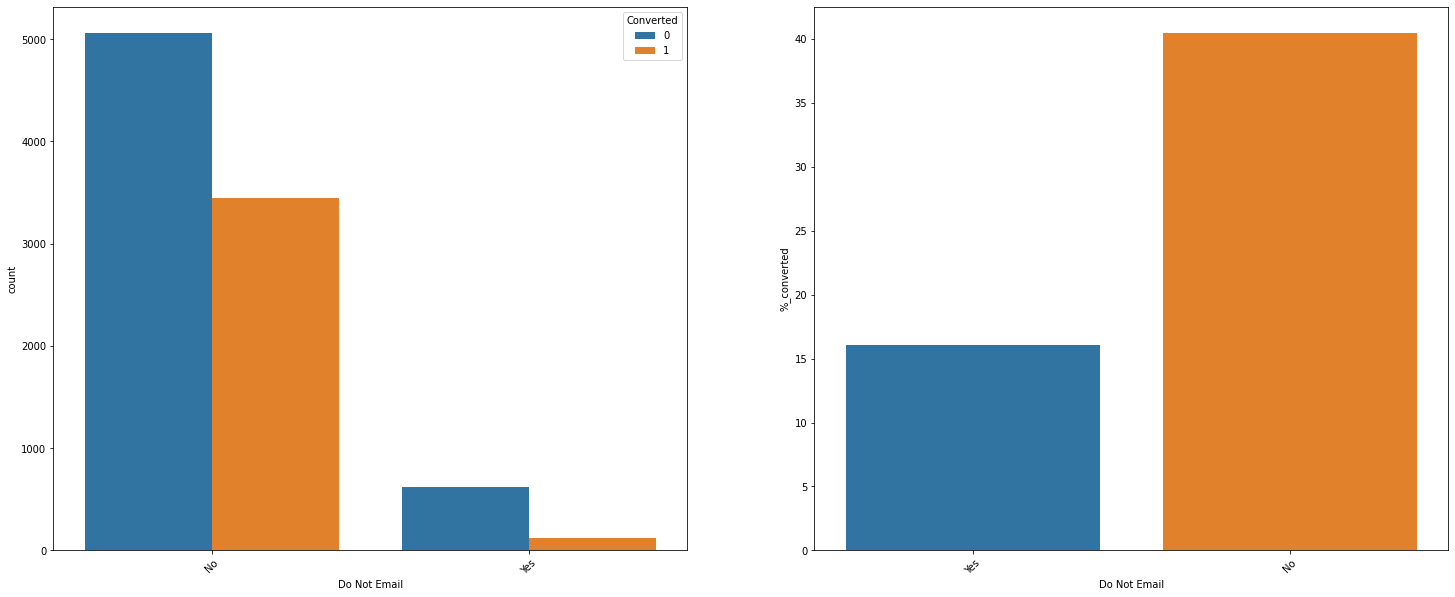

In [70]:
univariate_analysis('Do Not Email')

**Insight:-** Maximum number of people prefer receiving mail.
          40 percent of people are converted who prefer receiving mail.

In [71]:
#keeping Do Not Email
l.remove('Do Not Email')


#dropping irrelevant columns
leads_df.drop(columns=l,inplace=True)

#checking the data fram after removing columns
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified


##Univariate analysis on numericals variable

In [72]:
num_col=[i for i in list(leads_df.columns) if leads_df[i].dtype != 'O']
#num_col.remove('Converted')
num_col

['Converted', 'TotalVisits', 'Time on Website', 'Page Views Per Visit']

In [73]:
leads_df[num_col].describe()

,Converted,TotalVisits,Time on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,10.000000,2272.000000,6.000000


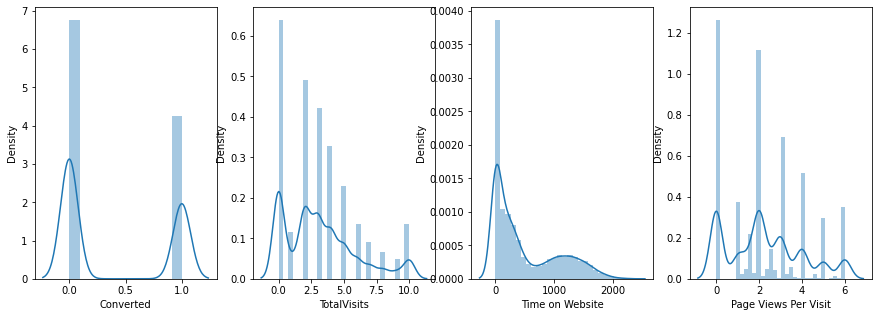

In [74]:
#checkin distribution of data
plt.figure(figsize=(15,5))
for i in range(len(num_col)):
  plt.subplot(1,4,i+1)
  sns.distplot(leads_df[num_col[i]])
plt.show()

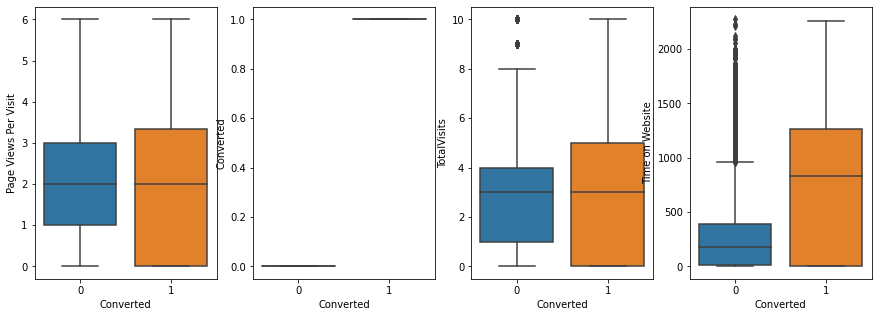

In [75]:
#checking distrbution of data in quantile range using boxplot
plt.figure(figsize=(15,5))
for i in range(len(num_col)):
  plt.subplot(1,4,i+1)
  sns.boxplot(y=leads_df[num_col[i-1]],x=leads_df['Converted'])
  
plt.show()

## Bivariate analysis

<Figure size 1440x1440 with 0 Axes>

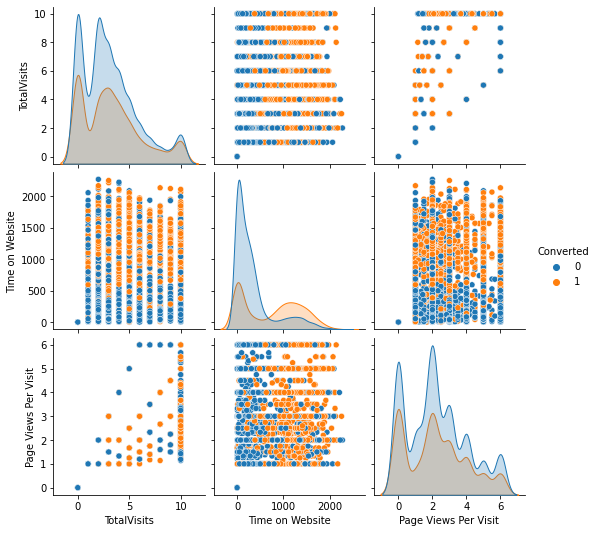

In [76]:
plt.figure(figsize =(20,20))
sns.pairplot(leads_df[num_col], hue='Converted')                                  
plt.show()

**Insight:-**  There is no visible pattern in the data moreover it is not normally distributed.

##Multivariate Analysis

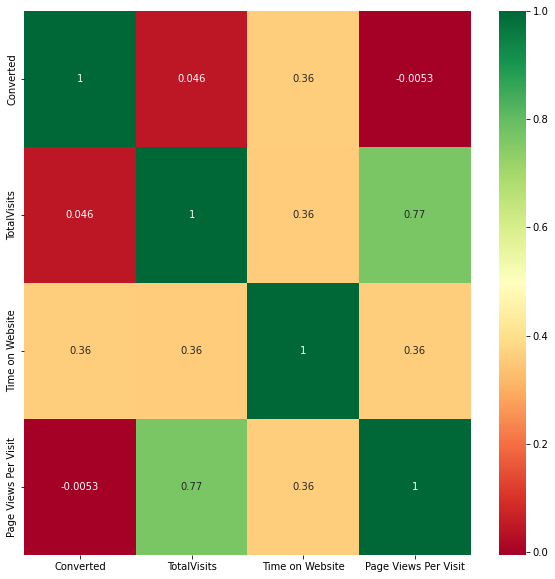

In [77]:
#plotting heatmap and checking the corelation of the numericals variables
from matplotlib.colors import Colormap
plt.figure(figsize=(10,10))
sns.heatmap(leads_df[num_col].corr(),annot=True,cmap='RdYlGn')
plt.show()

**Insight:-** There is some collinearity between Time on website and Page views Per Visit and there is also high collinearity between TotalVisits and Page Views Per Visit. We will use VIF to deal with this.

# Data Preparation for Model Building

In [78]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified


In [79]:
#checking the unique value in Do Not Email column
leads_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [80]:
# mapping Do Not Email column containing Yes and No to 1 and 0

leads_df['Do Not Email']=leads_df['Do Not Email'].map({'Yes':1,'No':0})

leads_df['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [81]:
#checking the unique value in the data frame
leads_df.nunique().sort_values()

Do Not Email                2
Converted                   2
Lead Origin                 5
Occupation                  7
Lead Source                 9
TotalVisits                11
Last Activity              12
Last Notable Activity      16
Specialization             19
Page Views Per Visit       91
Time on Website          1731
dtype: int64

##Dummy Variable Creation

In [82]:
# Dummy Variable creation
dummy_col =pd.get_dummies(leads_df[['Lead Origin','Occupation','Lead Source','Last Activity','Last Notable Activity','Specialization']], drop_first=True)

#concating both the data set
leads_df=pd.concat([leads_df,dummy_col],axis=1)

leads_df.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unkown,Occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Less Popular Sources,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Less Popular Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [83]:
#dropping the columns 
leads_df.drop(columns=['Lead Origin','Occupation','Lead Source','Last Activity','Last Notable Activity','Specialization'],inplace =True)

# details of the dataframe 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9240 non-null   int64  
 1   Converted                                           9240 non-null   int64  
 2   TotalVisits                                         9240 non-null   float64
 3   Time on Website                                     9240 non-null   int64  
 4   Page Views Per Visit                                9240 non-null   float64
 5   Lead Origin_Landing Page Submission                 9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                           9240 non-null   uint8  
 7   Lead Origin_Lead Import                             9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                          9240 non-null   uint8  
 9

**Insight:-** Dataframe has total 9240 rows and 67 columns

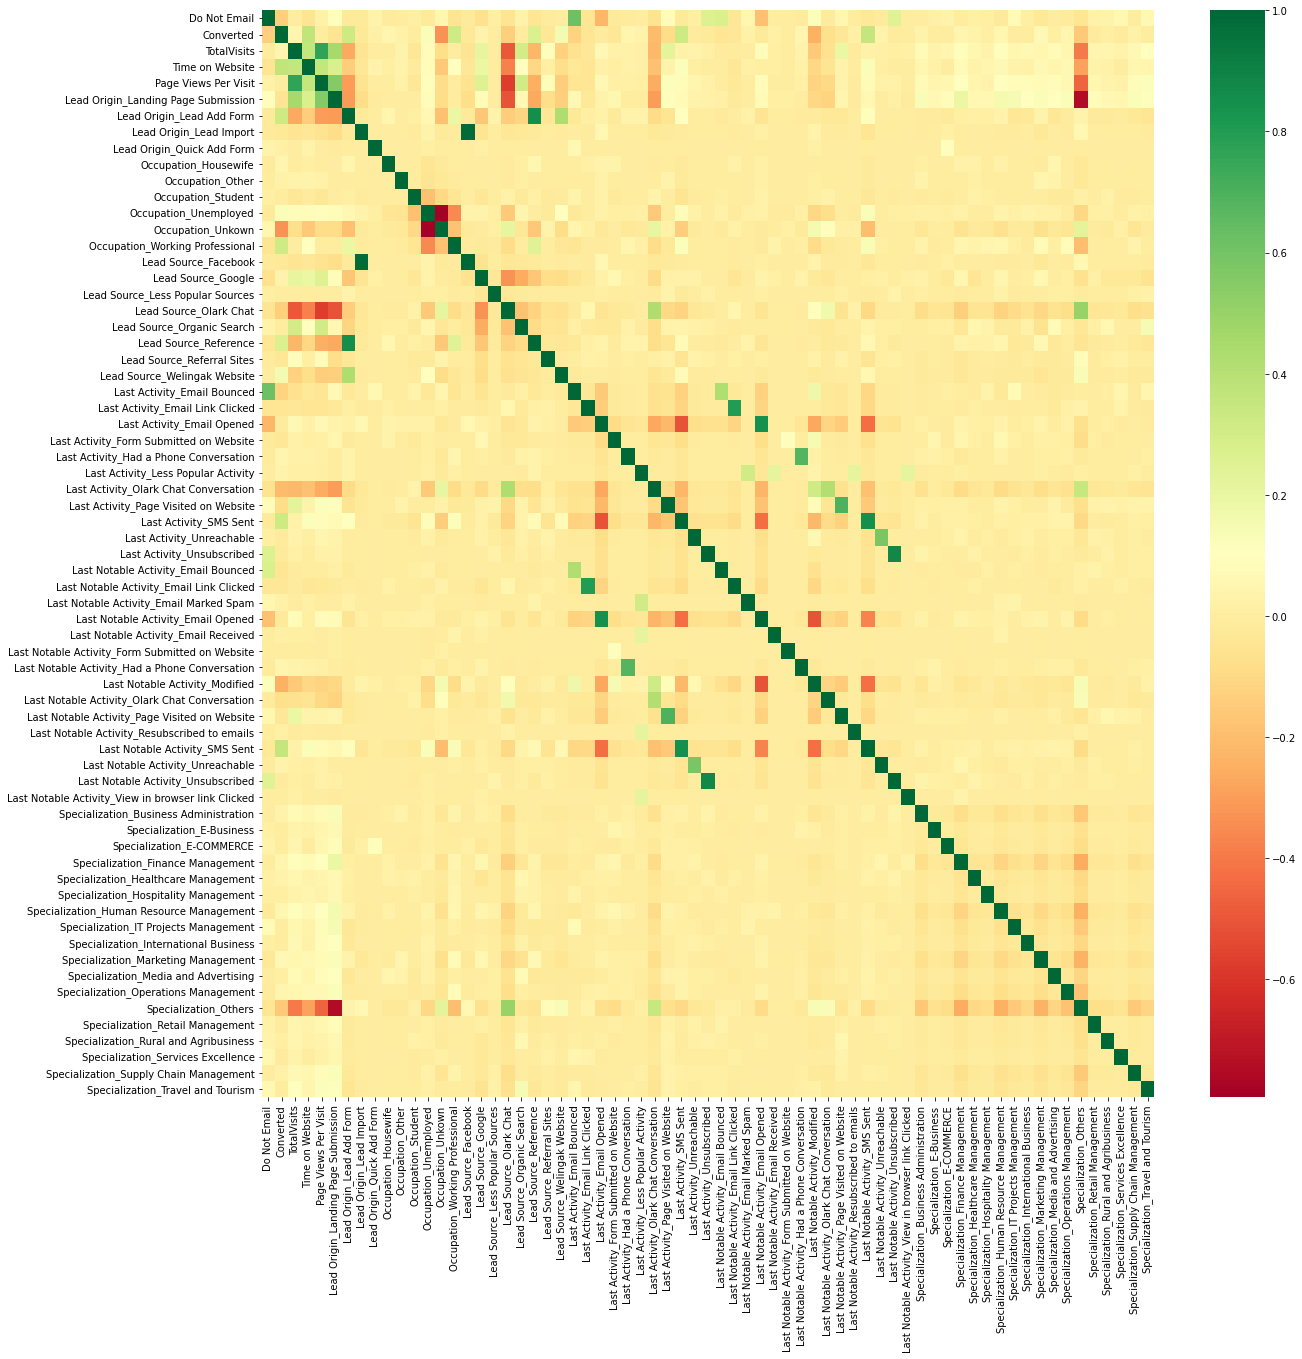

In [84]:
#using heat map to visualize the overall dataframe
plt.figure(figsize=(20,20))
sns.heatmap(leads_df.corr(),cmap='RdYlGn')
plt.show()

##Train-Test Split

In [85]:
#separating the dependent  and independent variable
Y=leads_df.pop('Converted')
X=leads_df

#splitting the dataframe in train set and test set with a 70:30 ratio
X_train , X_test , y_train , y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)

In [86]:
#y-train data set
display(y_train.head())

#y-test data set
display(y_test.head())

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

4269    1
2376    1
7766    1
9199    0
4359    1
Name: Converted, dtype: int64

In [87]:
#X-train data set
display(X_train.head())

#X-test data set
display(X_test.head())

,Do Not Email,TotalVisits,Time on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unkown,Occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Less Popular Sources,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Less Popular Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,4.0,487,1.33,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3516,0,5.0,106,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,0,5.0,1230,5.00,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


,Do Not Email,TotalVisits,Time on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unkown,Occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Less Popular Sources,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Less Popular Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,8.0,1011,6.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2376,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7766,0,5.0,59,5.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4359,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [88]:
#checking the shape of the dataframes
print('y_train shape - ',y_train.shape)
print('y_test shape - ',y_test.shape)
print('X_train shape - ',X_train.shape)
print('X_test shape - ',X_test.shape)

y_train shape -  (6468,)
y_test shape -  (2772,)
X_train shape -  (6468, 66)
X_test shape -  (2772, 66)


In [89]:
X_train.head()

,Do Not Email,TotalVisits,Time on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unkown,Occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Less Popular Sources,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Less Popular Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,4.0,487,1.33,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3516,0,5.0,106,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,0,5.0,1230,5.00,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Scaling the Feature

In [90]:
# Scaling the feature using Standard scaler

#making an instances
scaler = StandardScaler()


# fitting and transfomin the numericals columns
X_train[['TotalVisits','Time on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Time on Website','Page Views Per Visit']])

X_train[['TotalVisits','Time on Website','Page Views Per Visit']].head()

,TotalVisits,Time on Website,Page Views Per Visit
1871,-1.149699,-0.885371,-1.266675
6795,0.299722,0.005716,-0.516439
3516,0.662077,-0.691418,0.143543
8105,0.662077,1.365219,1.553761
3934,-1.149699,-0.885371,-1.266675


#Model Building 

Using **Recursive feature elemination** to select the top **20** variables for our Model

In [91]:
# recursive featur elemination
log_reg = LogisticRegression()

# running RFE with 20 variables
rfe = RFE(log_reg,n_features_to_select= 20)

# fitting the dataframe
rfe=rfe.fit(X_train ,y_train)


In [92]:
# listing all the columns with rankings 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 15),
 ('Time on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 23),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 8),
 ('Occupation_Student', False, 9),
 ('Occupation_Unemployed', False, 7),
 ('Occupation_Unkown', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Less Popular Sources', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Opened', True, 1),
 ('La

In [93]:
#important columns selected by RFE
col=list(X_train.columns[rfe.support_])
col

['Do Not Email',
 'Time on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Occupation_Housewife',
 'Occupation_Unkown',
 'Occupation_Working Professional',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Less Popular Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Unreachable',
 'Specialization_Hospitality Management',
 'Specialization_Others']

In [94]:
# dataframe with RFE selected variables
X_train[col].head()


,Do Not Email,Time on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Occupation_Housewife,Occupation_Unkown,Occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Less Popular Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable,Specialization_Hospitality Management,Specialization_Others
1871,0,-0.885371,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6795,0,0.005716,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3516,0,-0.691418,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
8105,0,1.365219,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1


In [95]:
# less important columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Less Popular Sources', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Res

In [96]:
#creating function for building logistics regression
def log_model(col_list):
  X_train_sm=sm.add_constant(X_train[col_list])
  logistic_model = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial()).fit()
  return (logistic_model,X_train_sm)


In [97]:
#creating function to calculate vif
def cal_VIF(X_train_rfe):
  VIF=pd.DataFrame()
  X=X_train_rfe
  VIF['Features']=X.columns
  VIF['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  VIF['VIF']=round(VIF['VIF'],2)
  VIF.sort_values(by='VIF',ascending=False,inplace=True)
  return VIF

##Manual Feature Selection

**Model 1**

In [98]:
#Building First Model
Model1,X_train_sm1 = log_model(col)
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.0
Date:                Fri, 03 Mar 2023   Deviance:                       5126.1
Time:                        12:15:58   Pearson chi2:                 7.05e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4154
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.4347      0.158     -2.746      0.006      -0.745      -0.124
Do Not Email                                      -1.1139      0.184     -6.051      0.000      -1.475      -0.753
Time on Website                                    1.0817      0.040     26.737      0.000       1.002       1.161
Lead Origin_Landing Page Submission               -1.0481      0.130     -8.047      0.000      -1.303      -0.793
Lead Origin_Lead Add Form                          2.8945      0.205     14.122      0.000       2.493       3.296
Occupation_Housewife                              22.8919   1.34e+04      0.002      0.999   -2.63e+04    2.64e+04
Occupation_Unkown                                 -1.0158      0.089    -11.461      0.000      -1.189      -0.842
Occupation_Working Professional                    2.4304      0.193     12.623      0.000       2.053       2.808
Lead Source_Olark Chat                             1.0357      0.123      8.428      0.000       0.795       1.277
Lead Source_Welingak Website                       2.3916      0.747      3.203      0.001       0.928       3.855
Last Activity_Email Opened                         0.4988      0.111      4.490      0.000       0.281       0.717
Last Activity_Had a Phone Conversation             1.4598      0.968      1.508      0.131      -0.437       3.357
Last Activity_Less Popular Activity                1.9938      0.680      2.931      0.003       0.660       3.327
Last Activity_SMS Sent                             1.6613      0.112     14.845      0.000       1.442       1.881
Last Activity_Unsubscribed                         1.0989      0.494      2.223      0.026       0.130       2.068
Last Notable Activity_Had a Phone Conversation     2.2565      1.482      1.523      0.128      -0.648       5.161
Last Notable Activity_Modified                    -0.7460      0.090     -8.244      0.000      -0.923      -0.569
Last Notable Activity_Olark Chat Conversation     -0.6547      0.354     -1.851      0.064      -1.348       0.039
Last Notable Activity_Unreachable                  2.1046      0.554      3.799      0.000       1.019       3.190
Specialization_Hospitality Management             -0.9788      0.333     -2.935      0.003      -1.632      -0.325
Specialization_Others                             -0.9785      0.125     -7.824      0.000      -1.224      -0.733
==================================================================================================================
"""

In [99]:
# calculating VIF for each columns
cal_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.42
19,Specialization_Others,2.92
9,Last Activity_Email Opened,2.43
12,Last Activity_SMS Sent,2.24
10,Last Activity_Had a Phone Conversation,2.03
14,Last Notable Activity_Had a Phone Conversation,2.01
7,Lead Source_Olark Chat,1.99
15,Last Notable Activity_Modified,1.96
3,Lead Origin_Lead Add Form,1.72
5,Occupation_Unkown,1.64


**Insight:-** Removing Occupation_Housewife column as it contain high p-value

**Model 2**

In [100]:
#building model 2
col.remove('Occupation_Housewife')
Model2,X_train_sm2=log_model(col)
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.1
Date:                Fri, 03 Mar 2023   Deviance:                       5140.2
Time:                        12:15:58   Pearson chi2:                 7.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4141
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.4312      0.158     -2.729      0.006      -0.741      -0.122
Do Not Email                                      -1.1191      0.184     -6.081      0.000      -1.480      -0.758
Time on Website                                    1.0804      0.040     26.741      0.000       1.001       1.160
Lead Origin_Landing Page Submission               -1.0425      0.130     -8.011      0.000      -1.298      -0.787
Lead Origin_Lead Add Form                          2.9096      0.205     14.215      0.000       2.508       3.311
Occupation_Unkown                                 -1.0205      0.089    -11.525      0.000      -1.194      -0.847
Occupation_Working Professional                    2.4210      0.192     12.581      0.000       2.044       2.798
Lead Source_Olark Chat                             1.0347      0.123      8.425      0.000       0.794       1.275
Lead Source_Welingak Website                       2.3754      0.747      3.181      0.001       0.912       3.839
Last Activity_Email Opened                         0.5015      0.111      4.527      0.000       0.284       0.719
Last Activity_Had a Phone Conversation             1.4504      0.968      1.498      0.134      -0.447       3.348
Last Activity_Less Popular Activity                1.9858      0.681      2.918      0.004       0.652       3.320
Last Activity_SMS Sent                             1.6556      0.112     14.823      0.000       1.437       1.874
Last Activity_Unsubscribed                         1.0988      0.494      2.223      0.026       0.130       2.067
Last Notable Activity_Had a Phone Conversation     2.2585      1.482      1.524      0.128      -0.646       5.163
Last Notable Activity_Modified                    -0.7397      0.090     -8.193      0.000      -0.917      -0.563
Last Notable Activity_Olark Chat Conversation     -0.6537      0.354     -1.848      0.065      -1.347       0.040
Last Notable Activity_Unreachable                  2.1004      0.554      3.791      0.000       1.014       3.186
Specialization_Hospitality Management             -0.9861      0.333     -2.958      0.003      -1.639      -0.333
Specialization_Others                             -0.9821      0.125     -7.859      0.000      -1.227      -0.737
==================================================================================================================
"""

In [101]:
# calculating VIF for each columns
cal_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.42
18,Specialization_Others,2.92
8,Last Activity_Email Opened,2.43
11,Last Activity_SMS Sent,2.24
9,Last Activity_Had a Phone Conversation,2.03
13,Last Notable Activity_Had a Phone Conversation,2.01
6,Lead Source_Olark Chat,1.99
14,Last Notable Activity_Modified,1.96
3,Lead Origin_Lead Add Form,1.71
4,Occupation_Unkown,1.64


**Insight:-** Removing Last Activity_Had a Phone Conversation column as it contain high p-value

**Model 3**

In [102]:
#building model 3
col.remove('Last Activity_Had a Phone Conversation')
Model3,X_train_sm3 = log_model(col)
Model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.3
Date:                Fri, 03 Mar 2023   Deviance:                       5142.6
Time:                        12:15:59   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4139
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.4226      0.158     -2.678      0.007      -0.732      -0.113
Do Not Email                                      -1.1237      0.184     -6.104      0.000      -1.484      -0.763
Time on Website                                    1.0816      0.040     26.773      0.000       1.002       1.161
Lead Origin_Landing Page Submission               -1.0424      0.130     -8.012      0.000      -1.297      -0.787
Lead Origin_Lead Add Form                          2.9168      0.205     14.251      0.000       2.516       3.318
Occupation_Unkown                                 -1.0212      0.089    -11.535      0.000      -1.195      -0.848
Occupation_Working Professional                    2.4310      0.192     12.644      0.000       2.054       2.808
Lead Source_Olark Chat                             1.0325      0.123      8.411      0.000       0.792       1.273
Lead Source_Welingak Website                       2.3668      0.747      3.170      0.002       0.904       3.830
Last Activity_Email Opened                         0.4916      0.110      4.450      0.000       0.275       0.708
Last Activity_Less Popular Activity                1.9730      0.681      2.898      0.004       0.639       3.307
Last Activity_SMS Sent                             1.6460      0.111     14.776      0.000       1.428       1.864
Last Activity_Unsubscribed                         1.0929      0.494      2.211      0.027       0.124       2.062
Last Notable Activity_Had a Phone Conversation     3.7008      1.127      3.285      0.001       1.493       5.909
Last Notable Activity_Modified                    -0.7360      0.090     -8.158      0.000      -0.913      -0.559
Last Notable Activity_Olark Chat Conversation     -0.6615      0.354     -1.870      0.061      -1.355       0.032
Last Notable Activity_Unreachable                  2.0922      0.554      3.776      0.000       1.006       3.178
Specialization_Hospitality Management             -0.9898      0.333     -2.968      0.003      -1.643      -0.336
Specialization_Others                             -0.9811      0.125     -7.853      0.000      -1.226      -0.736
==================================================================================================================
"""

In [103]:
# calculating VIF for each columns
cal_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.41
17,Specialization_Others,2.92
8,Last Activity_Email Opened,2.43
10,Last Activity_SMS Sent,2.23
6,Lead Source_Olark Chat,1.99
13,Last Notable Activity_Modified,1.95
3,Lead Origin_Lead Add Form,1.71
4,Occupation_Unkown,1.64
7,Lead Source_Welingak Website,1.27
1,Time on Website,1.26


**Insight:-** Removing Last Notable Activity_Olark Chat Conversation	 column as it contain high p-value

**Model 4**

In [104]:
#Building Model 4
col.remove('Last Notable Activity_Olark Chat Conversation')
Model4,X_train_sm4=log_model(col)
Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.2
Date:                Fri, 03 Mar 2023   Deviance:                       5146.5
Time:                        12:15:59   Pearson chi2:                 6.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4136
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.4802      0.155     -3.093      0.002      -0.784      -0.176
Do Not Email                                      -1.1066      0.184     -6.018      0.000      -1.467      -0.746
Time on Website                                    1.0797      0.040     26.726      0.000       1.001       1.159
Lead Origin_Landing Page Submission               -1.0433      0.130     -8.016      0.000      -1.298      -0.788
Lead Origin_Lead Add Form                          2.9083      0.205     14.216      0.000       2.507       3.309
Occupation_Unkown                                 -1.0305      0.088    -11.659      0.000      -1.204      -0.857
Occupation_Working Professional                    2.4350      0.192     12.657      0.000       2.058       2.812
Lead Source_Olark Chat                             1.0141      0.122      8.285      0.000       0.774       1.254
Lead Source_Welingak Website                       2.3757      0.747      3.181      0.001       0.912       3.840
Last Activity_Email Opened                         0.5516      0.106      5.187      0.000       0.343       0.760
Last Activity_Less Popular Activity                2.0108      0.681      2.952      0.003       0.676       3.346
Last Activity_SMS Sent                             1.7033      0.108     15.808      0.000       1.492       1.914
Last Activity_Unsubscribed                         1.1381      0.494      2.306      0.021       0.171       2.106
Last Notable Activity_Had a Phone Conversation     3.7609      1.127      3.338      0.001       1.553       5.969
Last Notable Activity_Modified                    -0.7001      0.088     -7.934      0.000      -0.873      -0.527
Last Notable Activity_Unreachable                  2.1566      0.553      3.897      0.000       1.072       3.241
Specialization_Hospitality Management             -0.9884      0.333     -2.964      0.003      -1.642      -0.335
Specialization_Others                             -0.9876      0.125     -7.903      0.000      -1.233      -0.743
==================================================================================================================
"""

In [105]:
# calculating VIF for each columns
cal_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.28
16,Specialization_Others,2.82
8,Last Activity_Email Opened,2.32
10,Last Activity_SMS Sent,2.15
6,Lead Source_Olark Chat,1.94
13,Last Notable Activity_Modified,1.87
3,Lead Origin_Lead Add Form,1.69
4,Occupation_Unkown,1.63
7,Lead Source_Welingak Website,1.27
1,Time on Website,1.25


**Insight:-** Removing Last Activity_Unsubscribed column as it contain high p-value

**Model 5**

In [106]:
#building Model 5
col.remove('Last Activity_Unsubscribed')
Model5,X_train_sm5=log_model(col)
Model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.6
Date:                Fri, 03 Mar 2023   Deviance:                       5151.2
Time:                        12:16:00   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.4544      0.155     -2.938      0.003      -0.757      -0.151
Do Not Email                                      -0.9970      0.174     -5.720      0.000      -1.339      -0.655
Time on Website                                    1.0794      0.040     26.726      0.000       1.000       1.159
Lead Origin_Landing Page Submission               -1.0466      0.130     -8.043      0.000      -1.302      -0.792
Lead Origin_Lead Add Form                          2.9128      0.205     14.228      0.000       2.512       3.314
Occupation_Unkown                                 -1.0276      0.088    -11.633      0.000      -1.201      -0.854
Occupation_Working Professional                    2.4395      0.192     12.680      0.000       2.062       2.817
Lead Source_Olark Chat                             1.0126      0.122      8.276      0.000       0.773       1.252
Lead Source_Welingak Website                       2.3540      0.746      3.154      0.002       0.891       3.817
Last Activity_Email Opened                         0.5301      0.106      5.017      0.000       0.323       0.737
Last Activity_Less Popular Activity                1.9952      0.682      2.925      0.003       0.658       3.332
Last Activity_SMS Sent                             1.6761      0.107     15.705      0.000       1.467       1.885
Last Notable Activity_Had a Phone Conversation     3.7370      1.127      3.317      0.001       1.529       5.945
Last Notable Activity_Modified                    -0.7156      0.088     -8.136      0.000      -0.888      -0.543
Last Notable Activity_Unreachable                  2.1295      0.553      3.854      0.000       1.047       3.213
Specialization_Hospitality Management             -0.9690      0.331     -2.924      0.003      -1.619      -0.319
Specialization_Others                             -0.9901      0.125     -7.926      0.000      -1.235      -0.745
==================================================================================================================
"""

In [107]:
cal_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.26
15,Specialization_Others,2.81
8,Last Activity_Email Opened,2.31
10,Last Activity_SMS Sent,2.14
6,Lead Source_Olark Chat,1.94
12,Last Notable Activity_Modified,1.86
3,Lead Origin_Lead Add Form,1.68
4,Occupation_Unkown,1.63
7,Lead Source_Welingak Website,1.27
1,Time on Website,1.25


**Insight:-** As all the columns have p-value less than 5% so they are significant. Hence now we will remove columns having high negative coefficent as we are trying the maximize the cost function . 

Removing Occupation_Unkown as it has high negative coeficient value and it is also a imputted value.





**Model 6**

In [108]:
#building Model 6
col.remove('Occupation_Unkown')
Model6,X_train_sm6=log_model(col)
Model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.5
Date:                Fri, 03 Mar 2023   Deviance:                       5297.1
Time:                        12:16:00   Pearson chi2:                 7.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5606      0.153     -3.671      0.000      -0.860      -0.261
Do Not Email                                      -1.0017      0.172     -5.821      0.000      -1.339      -0.664
Time on Website                                    1.0797      0.040     27.135      0.000       1.002       1.158
Lead Origin_Landing Page Submission               -1.1531      0.129     -8.925      0.000      -1.406      -0.900
Lead Origin_Lead Add Form                          3.1482      0.204     15.403      0.000       2.748       3.549
Occupation_Working Professional                    2.6710      0.194     13.798      0.000       2.292       3.050
Lead Source_Olark Chat                             0.9148      0.120      7.627      0.000       0.680       1.150
Lead Source_Welingak Website                       2.4460      0.747      3.275      0.001       0.982       3.910
Last Activity_Email Opened                         0.5328      0.104      5.125      0.000       0.329       0.737
Last Activity_Less Popular Activity                2.1641      0.670      3.231      0.001       0.851       3.477
Last Activity_SMS Sent                             1.7141      0.105     16.389      0.000       1.509       1.919
Last Notable Activity_Had a Phone Conversation     3.7022      1.110      3.335      0.001       1.527       5.878
Last Notable Activity_Modified                    -0.8192      0.086     -9.535      0.000      -0.988      -0.651
Last Notable Activity_Unreachable                  1.9275      0.526      3.666      0.000       0.897       2.958
Specialization_Hospitality Management             -1.0206      0.328     -3.107      0.002      -1.664      -0.377
Specialization_Others                             -1.1956      0.124     -9.659      0.000      -1.438      -0.953
==================================================================================================================
"""

In [109]:
cal_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.15
14,Specialization_Others,2.65
7,Last Activity_Email Opened,2.31
9,Last Activity_SMS Sent,2.14
5,Lead Source_Olark Chat,1.91
11,Last Notable Activity_Modified,1.82
3,Lead Origin_Lead Add Form,1.68
6,Lead Source_Welingak Website,1.27
1,Time on Website,1.25
4,Occupation_Working Professional,1.20


**Insight:-** Removing Specialization_Others column as it contain high negative coefficient value .

**Model 7**

In [110]:
col.remove('Specialization_Others')
Model7,X_train_sm7=log_model(col)
Model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.7
Date:                Fri, 03 Mar 2023   Deviance:                       5393.4
Time:                        12:16:00   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5092      0.117    -12.927      0.000      -1.738      -1.280
Do Not Email                                      -1.0131      0.171     -5.912      0.000      -1.349      -0.677
Time on Website                                    1.1066      0.040     27.991      0.000       1.029       1.184
Lead Origin_Landing Page Submission               -0.2612      0.088     -2.962      0.003      -0.434      -0.088
Lead Origin_Lead Add Form                          3.5675      0.201     17.781      0.000       3.174       3.961
Occupation_Working Professional                    2.8604      0.190     15.094      0.000       2.489       3.232
Lead Source_Olark Chat                             0.8593      0.116      7.407      0.000       0.632       1.087
Lead Source_Welingak Website                       1.8485      0.744      2.485      0.013       0.391       3.306
Last Activity_Email Opened                         0.5692      0.102      5.566      0.000       0.369       0.770
Last Activity_Less Popular Activity                2.0628      0.681      3.030      0.002       0.728       3.397
Last Activity_SMS Sent                             1.7068      0.103     16.534      0.000       1.505       1.909
Last Notable Activity_Had a Phone Conversation     3.9275      1.102      3.563      0.000       1.767       6.088
Last Notable Activity_Modified                    -0.8188      0.085     -9.667      0.000      -0.985      -0.653
Last Notable Activity_Unreachable                  2.0930      0.519      4.035      0.000       1.076       3.110
Specialization_Hospitality Management             -0.8389      0.324     -2.587      0.010      -1.474      -0.203
==================================================================================================================
"""

In [111]:
cal_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.57
7,Last Activity_Email Opened,1.84
9,Last Activity_SMS Sent,1.76
3,Lead Origin_Lead Add Form,1.67
5,Lead Source_Olark Chat,1.61
11,Last Notable Activity_Modified,1.49
1,Time on Website,1.25
6,Lead Source_Welingak Website,1.24
4,Occupation_Working Professional,1.18
0,Do Not Email,1.16


In [112]:
#final list of variable which are important for prediction
col

['Do Not Email',
 'Time on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Occupation_Working Professional',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_Less Popular Activity',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Unreachable',
 'Specialization_Hospitality Management']

**Insight:-** We will use Model 7 as our final model as all the p-value are less than 5% and VIF is also less than 5

#Model Evaluation

In [113]:
# predicting the value on train set using model7 

y_train_pred = Model7.predict(X_train_sm7)
y_train_pred[:10]


1871    0.257218
6795    0.232387
3516    0.300304
8105    0.809566
3934    0.132476
4844    0.992296
3297    0.118277
8071    0.978346
987     0.160099
7423    0.915495
dtype: float64

In [114]:
#Reshaping

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2572185 , 0.23238691, 0.30030439, 0.80956629, 0.13247578,
       0.99229632, 0.11827731, 0.97834588, 0.16009871, 0.91549497])

In [115]:
# Creating a dataframe with Actual Predicted and Predicted Probabilites

y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Converted_Probability':y_train_pred})
y_train_pred_df['ID'] = y_train.index
y_train_pred_df.head()

,Converted,Converted_Probability,ID
0,0,0.257218,1871
1,0,0.232387,6795
2,0,0.300304,3516
3,0,0.809566,8105
4,0,0.132476,3934


In [116]:
#adding a new column Predict and assiging 1 if probablity is greater than 0.5 or 0 if it is less than 0.5
y_train_pred_df['Predict'] = y_train_pred_df['Converted_Probability'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Converted_Probability,ID,Predict
0,0,0.257218,1871,0
1,0,0.232387,6795,0
2,0,0.300304,3516,0
3,0,0.809566,8105,1
4,0,0.132476,3934,0


In [117]:
# Using Confusion Matrix 

confusion_mat = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predict )
print(confusion_mat)

[[3564  438]
 [ 734 1732]]


In [118]:
# Predicted     not_converted    converted
# Actual
# not_converted        3564      438
# converted            734       1732

**Metrics Will be used for Evaluation** - Accuracy ,Sensitivity, Specificity, Precision, Recall ,True Positive Rate , True Negative Rate,False Positive Rate ,False Negative Rate, Postitive Predictive Value and Negative Predictive Value

In [119]:
# function to calculate the evaluation Metrix
def evaluation_metrics(confusion_matrix):
    TN =confusion_matrix[0,0] # true negative
    TP =confusion_matrix[1,1] # true positive
    FP =confusion_matrix[0,1] # False positive
    FN =confusion_matrix[1,0] # False Negative

    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(TN+FP)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    True_Positive_Rate = TP/(TP + FN)
    True_Negative_Rate = TN/(TN + FP)
    False_Positive_Rate = FP/(TN + FP)
    False_Negative_Rate = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              = ", round(Accuracy*100,2),"%")
    print ("Model Sensitivity value is           = ", round(Sensitivity*100,2),"%")
    print ("Model Specificity value is           = ", round(Specificity*100,2),"%")
    print ("Model Precision value is             = ", round(Precision*100,2),"%")
    print ("Model Recall value is                = ", round(Recall*100,2),"%")
    print ("Model True Positive Rate             = ", round(True_Positive_Rate*100,2),"%")
    print ("Model False Positive Rate            = ", round(False_Positive_Rate*100,2),"%")
    print ("Model Poitive Prediction Value is    = ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   = ", round(neg_pred_val*100,2),"%")

In [120]:
evaluation_metrics(confusion_mat)

Model Accuracy value is              =  81.88 %
Model Sensitivity value is           =  70.24 %
Model Specificity value is           =  89.06 %
Model Precision value is             =  79.82 %
Model Recall value is                =  70.24 %
Model True Positive Rate             =  70.24 %
Model False Positive Rate            =  10.94 %
Model Poitive Prediction Value is    =  79.82 %
Model Negative Prediction value is   =  82.92 %


**Plotting ROC Curve**

Benefits of ROC Curve:-


1.   The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
2.  It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)
3.  The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test 



In [121]:
# creating a function to draw the ROC curve
def draw_roc( actual, probs ):
    FPR, TPR, Thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( FPR, TPR, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]',fontdict={'size':12})
    plt.ylabel('True Positive Rate',fontdict={'size':12})
    plt.title('Receiver operating characteristic example',fontdict={'size':15})
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
# recoring the values FPR, TPR and Thresholds:
FPR, TPR, Thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_Probability, drop_intermediate = False )
                                         


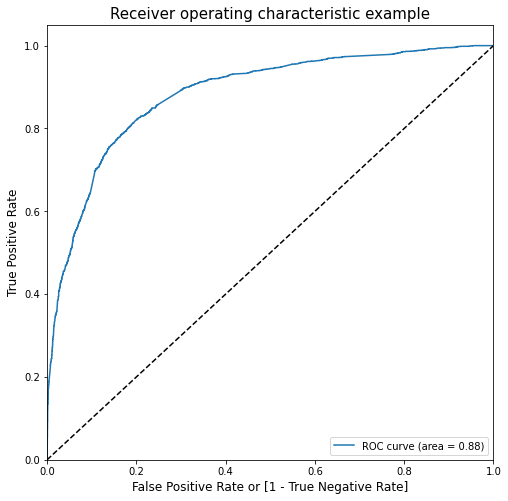

In [123]:
#plotting the ROC curve 
draw_roc(y_train_pred_df['Converted'], y_train_pred_df['Converted_Probability'])

**Optimal Cut-off Point** 



**Optimal cut off probability** is that probability where we get balanced sensitivity and specificity.

At first we have randomly taken 0.5 as our cut-off point now we will use the Optimal cut-off point to determine the cut-off value and calculate the Evalutaion Metrics once again.

In [124]:
# creating columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_df[i]= y_train_pred_df.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()


,Converted,Converted_Probability,ID,Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.257218,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.232387,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.300304,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.809566,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.132476,3934,0,1,1,0,0,0,0,0,0,0,0


In [125]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.

cut_off_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

for i in num:
    conf_mat = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(conf_mat))
    Accuracy = (conf_mat[0,0]+conf_mat[1,1])/total1
    Sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    Specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    cut_off_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cut_off_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.591373     0.970803     0.357571
0.2          0.2  0.748454     0.914436     0.646177
0.3          0.3  0.801639     0.830495     0.783858
0.4          0.4  0.818491     0.762368     0.853073
0.5          0.5  0.818800     0.702352     0.890555
0.6          0.6  0.796228     0.592457     0.921789
0.7          0.7  0.780612     0.515410     0.944028
0.8          0.8  0.761905     0.423358     0.970515
0.9          0.9  0.714750     0.271290     0.988006


<Figure size 1080x864 with 0 Axes>

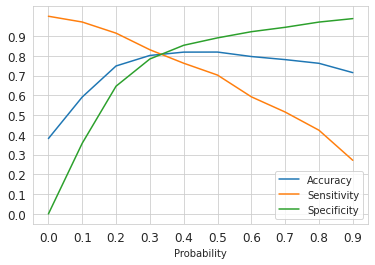

In [126]:
# Plotting accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
cut_off_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.yticks(np.arange(0,1,step=0.1),size=12)
plt.xticks(np.arange(0,1,step=0.1),size=12)
plt.show()

**Insight:-** From the above curve, **0.34** is the optimum point to take it as a cutoff probability.

In [127]:
# Making final prediction using 0.34 as the cut off

y_train_pred_df['Final_predicted_value'] = y_train_pred_df.Converted_Probability.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_df.head()


,Converted,Converted_Probability,ID,Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted_value
0,0,0.257218,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.232387,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.300304,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.809566,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.132476,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [128]:
# Calculating lead score 

y_train_pred_df['Lead_Score'] = y_train_pred_df.Converted_Probability.map(lambda x: round(x*100)).astype('int64')
y_train_pred_df.head(20)

,Converted,Converted_Probability,ID,Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted_value,Lead_Score
0,0,0.257218,1871,0,1,1,1,0,0,0,0,0,0,0,0,26
1,0,0.232387,6795,0,1,1,1,0,0,0,0,0,0,0,0,23
2,0,0.300304,3516,0,1,1,1,1,0,0,0,0,0,0,0,30
3,0,0.809566,8105,1,1,1,1,1,1,1,1,1,1,0,1,81
4,0,0.132476,3934,0,1,1,0,0,0,0,0,0,0,0,0,13
5,1,0.992296,4844,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.118277,3297,0,1,1,0,0,0,0,0,0,0,0,0,12
7,1,0.978346,8071,1,1,1,1,1,1,1,1,1,1,1,1,98
8,0,0.160099,987,0,1,1,0,0,0,0,0,0,0,0,0,16
9,1,0.915495,7423,1,1,1,1,1,1,1,1,1,1,1,1,92


In [129]:
# confusion matrix on final train data set
conf_matrix1 = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Final_predicted_value'] )

conf_matrix1

array([[3266,  736],
       [ 486, 1980]])

In [130]:
# Predicted     not_converted    converted
# Actual
# not_converted        3266      736
# converted            486       1980

In [131]:
evaluation_metrics(conf_matrix1)

Model Accuracy value is              =  81.11 %
Model Sensitivity value is           =  80.29 %
Model Specificity value is           =  81.61 %
Model Precision value is             =  72.9 %
Model Recall value is                =  80.29 %
Model True Positive Rate             =  80.29 %
Model False Positive Rate            =  18.39 %
Model Poitive Prediction Value is    =  72.9 %
Model Negative Prediction value is   =  87.05 %


In [132]:
print( metrics.classification_report( y_train_pred_df['Converted'], y_train_pred_df['Final_predicted_value'] ) )

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4002
           1       0.73      0.80      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.82      0.81      0.81      6468



In [133]:
# calculating the F! Score of the training set
print("F1 Score: {}".format(f1_score(y_train_pred_df['Converted'], y_train_pred_df['Final_predicted_value'])))

F1 Score: 0.7641837128521807


**Precision and recall tradeoff**

In [134]:
y_train_pred_df['Converted'], y_train_pred_df['Final_predicted_value']

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Final_predicted_value, Length: 6468, dtype: int64)

In [135]:
#varaibles needed for plotting precision recall trade off curve
p, r, thresholds = precision_recall_curve(y_train_pred_df['Converted'], y_train_pred_df['Converted_Probability'])

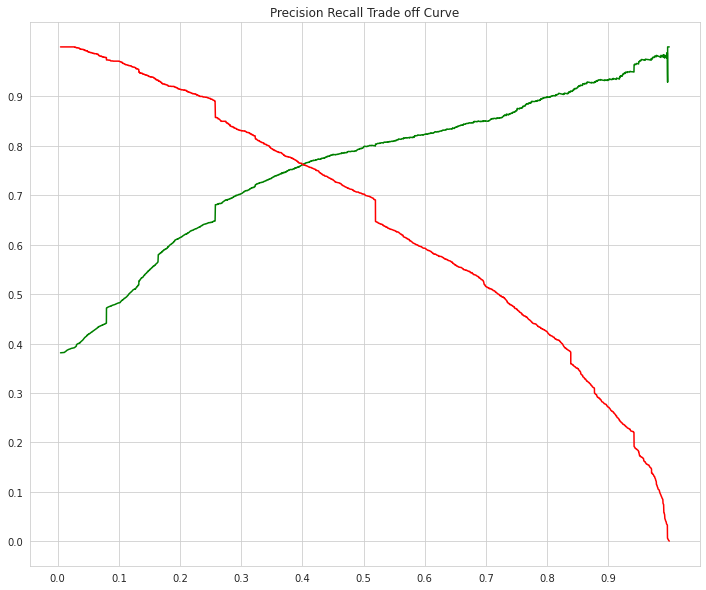

In [136]:
#plotting precision recall trade off curve
plt.figure(figsize=(12,10))
plt.title('Precision Recall Trade off Curve')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.yticks(np.arange(0,1,step=0.1))
plt.xticks(np.arange(0,1,step=0.1))
plt.show()

**Insight:-** It seems that the cut-off point is **0.4** based on the Precision Recall Trade off curve

# Making Prediction on the test set

In [137]:
# Scaling the test dataset 
X_test[['TotalVisits','Time on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Time on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Time on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unkown,Occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Less Popular Sources,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Less Popular Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,0.964504,2.117849,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [138]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[col]
X_test.head()

,Do Not Email,Time on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Less Popular Activity,Last Activity_SMS Sent,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Specialization_Hospitality Management
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0,0,0
2376,0,-0.885371,0,1,0,0,0,0,0,1,0,0,0,0
7766,0,-0.777416,0,0,1,0,0,0,0,0,0,0,1,0
9199,0,-0.885371,0,0,0,1,0,0,0,0,0,1,0,0
4359,0,-0.885371,0,1,0,0,0,1,0,0,0,0,0,0


In [139]:
#adding contant value to test set
X_test_sm = sm.add_constant(X_test)


Making predictions on the test set

In [140]:
y_test_pred = Model7.predict(X_test_sm)
y_test_pred[:10]

4269    0.779881
2376    0.941884
7766    0.929822
9199    0.079554
4359    0.838590
9186    0.548813
1631    0.467584
8963    0.201474
8007    0.053536
5324    0.327542
dtype: float64

In [141]:
# Converting y_test_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.779881
2376,0.941884
7766,0.929822
9199,0.079554
4359,0.838590


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [143]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Concating y_test_df and y_test_pred

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()


,Converted,ID,0
0,1,4269,0.779881
1,1,2376,0.941884
2,1,7766,0.929822
3,0,9199,0.079554
4,1,4359,0.838590


In [146]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

# arranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Probability'], axis=1)
y_pred_final.head()

,ID,Converted,Converted_Probability
0,4269,1,0.779881
1,2376,1,0.941884
2,7766,1,0.929822
3,9199,0,0.079554
4,4359,1,0.838590


We will use cut-off **0.34** and not Cut-off 0.4 which was obtained from precision recall trade off curve. As the goal is here to increase the Correct prediction of lead getting converted. So we will use the 
sensitivity specificity accuracy curve.

In [147]:
y_pred_final['Final_Predicted'] = y_pred_final['Converted_Probability'].map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,ID,Converted,Converted_Probability,Final_Predicted
0,4269,1,0.779881,1
1,2376,1,0.941884,1
2,7766,1,0.929822,1
3,9199,0,0.079554,0
4,4359,1,0.838590,1


In [148]:
# Confusion Matrix

conf_matrix_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_Predicted'])

evaluation_metrics(conf_matrix_test)

Model Accuracy value is              =  80.84 %
Model Sensitivity value is           =  79.27 %
Model Specificity value is           =  81.87 %
Model Precision value is             =  74.06 %
Model Recall value is                =  79.27 %
Model True Positive Rate             =  79.27 %
Model False Positive Rate            =  18.13 %
Model Poitive Prediction Value is    =  74.06 %
Model Negative Prediction value is   =  85.81 %


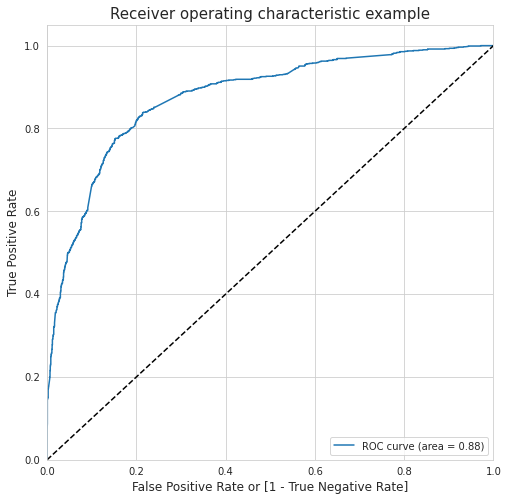

In [149]:
# plotting ROC curve

draw_roc( y_pred_final['Converted'], y_pred_final['Converted_Probability'])

**Insight:-** ROC curve value is **0.88** which shows that it is perfroming well on test set

In [150]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted'], y_pred_final['Final_Predicted'] ) )

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1677
           1       0.74      0.79      0.77      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.81      0.81      0.81      2772



In [151]:
# calculating the F! Score of the training set
print("F1 Score: {}".format(f1_score(y_pred_final['Converted'], y_pred_final['Final_Predicted'])))

F1 Score: 0.7657697397441552


In [152]:
# Assigning  Lead_score for the leads in Test Data Set : 
y_pred_final['Lead_Score']=(y_pred_final['Converted_Probability']*100).astype("int64")
y_pred_final.head(10)

,ID,Converted,Converted_Probability,Final_Predicted,Lead_Score
0,4269,1,0.779881,1,77
1,2376,1,0.941884,1,94
2,7766,1,0.929822,1,92
3,9199,0,0.079554,0,7
4,4359,1,0.838590,1,83
5,9186,1,0.548813,1,54
6,1631,1,0.467584,1,46
7,8963,1,0.201474,0,20
8,8007,0,0.053536,0,5
9,5324,1,0.327542,0,32


In [153]:
y_pred_final.tail(10)

,ID,Converted,Converted_Probability,Final_Predicted,Lead_Score
2762,5495,0,0.025419,0,2
2763,621,0,0.102587,0,10
2764,226,0,0.235116,0,23
2765,9202,0,0.705615,1,70
2766,3118,0,0.686776,1,68
2767,8649,0,0.103128,0,10
2768,2152,1,0.941884,1,94
2769,7101,0,0.257218,0,25
2770,5331,0,0.209801,0,20
2771,2960,1,0.941884,1,94


# Final Observation and Conclusion

**Train set:-**

*   Model Accuracy value is              =  81.11 %
*   Model Sensitivity value is           =  80.29 %
*   Model Specificity value is           =  81.61 %
*   Model Precision value is             =  72.90 %
*   Model Recall value is                =  80.29 %
*   Model F1-score value is              =  0.7641



**Test set:-**

*   Model Accuracy value is              =  80.84 %
*   Model Sensitivity value is           =  79.27 %
*   Model Specificity value is           =  81.87 %
*   Model Precision value is             =  74.06 %
*   Model Recall value is                =  79.27 %
*   Model F1-score value is              =  0.7657

**Model Features**

In [154]:
parameters = Model7.params[1:]
parameters

Do Not Email                                     -1.013077
Time on Website                                   1.106592
Lead Origin_Landing Page Submission              -0.261206
Lead Origin_Lead Add Form                         3.567522
Occupation_Working Professional                   2.860388
Lead Source_Olark Chat                            0.859270
Lead Source_Welingak Website                      1.848532
Last Activity_Email Opened                        0.569179
Last Activity_Less Popular Activity               2.062786
Last Activity_SMS Sent                            1.706841
Last Notable Activity_Had a Phone Conversation    3.927491
Last Notable Activity_Modified                   -0.818768
Last Notable Activity_Unreachable                 2.093032
Specialization_Hospitality Management            -0.838918
dtype: float64

In [155]:
#top predictor features

top_features = parameters
top_features = 100.0 * (top_features / top_features.max())
top_features

Do Not Email                                      -25.794517
Time on Website                                    28.175552
Lead Origin_Landing Page Submission                -6.650706
Lead Origin_Lead Add Form                          90.834614
Occupation_Working Professional                    72.829897
Lead Source_Olark Chat                             21.878355
Lead Source_Welingak Website                       47.066473
Last Activity_Email Opened                         14.492187
Last Activity_Less Popular Activity                52.521730
Last Activity_SMS Sent                             43.458806
Last Notable Activity_Had a Phone Conversation    100.000000
Last Notable Activity_Modified                    -20.847089
Last Notable Activity_Unreachable                  53.291834
Specialization_Hospitality Management             -21.360161
dtype: float64

In [156]:
top_features.sort_values(ascending = False)

Last Notable Activity_Had a Phone Conversation    100.000000
Lead Origin_Lead Add Form                          90.834614
Occupation_Working Professional                    72.829897
Last Notable Activity_Unreachable                  53.291834
Last Activity_Less Popular Activity                52.521730
Lead Source_Welingak Website                       47.066473
Last Activity_SMS Sent                             43.458806
Time on Website                                    28.175552
Lead Source_Olark Chat                             21.878355
Last Activity_Email Opened                         14.492187
Lead Origin_Landing Page Submission                -6.650706
Last Notable Activity_Modified                    -20.847089
Specialization_Hospitality Management             -21.360161
Do Not Email                                      -25.794517
dtype: float64

**Conclusion**

1. All variables have p-value < 0.05.

2. All the features have very low VIF values, meaning, there is hardly any multicollinearity among the features. This is also evident from the heat map.

3. The overall accuracy of test data set is 80.84%  at a probability threshold of 0.34 on the test dataset is also very acceptable.

4. The conversion probability of a lead increases with increase in values    of     the following features in descending order:
  1. Last Notable Activity_Had a Phone Conversation
  2. Lead Origin_Lead Add Form
  3. Occupation_Working Professional
  4. Last Notable Activity_Unreachable 
  5. Last Activity_Less Popular Activity
  6. Lead Source_Welingak Website 
  7. Last Activity_SMS Sent
  8. Time on Website
  9. Lead Source Olark Chat
  10. Last activity email opened.

5. The conversion probability of a lead increases with decrease in values of the following features in descending order:

  1. Lead Origin_Landing Page Submission 
  2. Last Notable Activity_Modified 
  3. Specialization_Hospitality Management  
  4. Do Not Email 

6. Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model. 

7. High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.

